### Setup packages 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=a14c714e4e0f453da16909ee1f0b8651412ca74955e8fd3adb2754d15c1cfeaf
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 137 µs (started: 2022-07-15 12:18:13 +00:00)


In [ ]:
from plotnine import *
from plotnine.themes import *

time: 1.38 s (started: 2022-07-15 12:18:13 +00:00)


In [ ]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp
from tqdm import tqdm

time: 2.69 s (started: 2022-07-15 12:18:14 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [ ]:
paper_name = "dgm_hjb"

time: 858 µs (started: 2022-07-15 12:18:17 +00:00)


In [ ]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

#make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")

time: 8.71 ms (started: 2022-07-15 12:18:17 +00:00)


In [ ]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 7.81 ms (started: 2022-07-15 12:18:17 +00:00)


In [ ]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb
from torch.utils.data import DataLoader


time: 2.26 s (started: 2022-07-15 12:18:17 +00:00)


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from pprint import pprint as pp

time: 1.8 s (started: 2022-07-15 12:18:19 +00:00)


### Shared functions across models

In [ ]:
import pandas as pd

def plot_report(train_instance):
        
    history_tl_cpu = [ x for x in train_instance.history_tl ]
    history_internal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_internal_cpu ]
    history_terminal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_terminal ]
    history_initial_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_initial ]
    history_nonzero_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_nonzero ]

    obs_data = pd.DataFrame({"Epochs" : [ (x+1)*train_instance.hook_interval for x in range(len(history_initial_cpu))], 
                             "AvgLogLoss": np.log(history_tl_cpu), 
                             "TerminalLogLoss" :  np.log(history_terminal_cpu),
                             "InternalLogLoss" :  np.log(history_internal_cpu),
                             "InitialLogLoss" : np.log(history_initial_cpu),
                             "NonZeroLogLoss" : np.log(history_nonzero_cpu),
                             })

    return (ggplot(obs_data, aes("Epochs","AvgLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","TerminalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InternalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InitialLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","NonZeroLogLoss")) + geom_line() + geom_point(),
            )

def plot_activation_mean(train_instance):
    
    # pdb.set_trace()

    if train_instance.debug == False:
        print( 'error: debug is off , turn it on and train again ' )
    else:
        history = np.array(train_instance.history_mean_hooks)
        jet= plt.get_cmap('jet')
        colors = iter(jet(np.linspace(0,1,10)))
        fig, ax = plt.subplots()
        for i in range(history.shape[1]):
            ax.plot(history[:,i], '--r', label= i , color=next(colors) )
        fig.suptitle('Layers activation mean value', fontsize=10)
        leg = ax.legend();


time: 25.4 ms (started: 2022-07-15 12:55:53 +00:00)


In [ ]:
# plot_report(train)
# plot_activation_mean(train)

time: 639 µs (started: 2022-07-15 12:55:54 +00:00)


In [ ]:
# print( 'Value at 0' , net( torch.tensor( [ 0. , 1. , 1. , 1. ] ).cuda() ) )
# #%% save
# torch.save(net.state_dict(), './model3Assets')
# #%%
# net = TheModelClass(*args, **kwargs)
# net.load_state_dict(torch.load('./modelmodel3Assets'))
# net.eval()

time: 1.02 ms (started: 2022-07-15 12:55:54 +00:00)


In [ ]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 29.9 ms (started: 2022-07-15 12:55:54 +00:00)


In [ ]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

[0.33334757 0.33333761 0.33331482]
time: 96.4 ms (started: 2022-07-15 12:55:54 +00:00)


In [ ]:
### There is an issue getting this to work because of nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)

    # def calculateLossAdaptWeights(self , size = 2**8 , train = True, min_max = True):
    #     '''
    #     Helper function that Sample and Calculate loss,
    #     This is adapted in that it changes the weights on the losses to maximize the loss provided
    #     the KL distance of the new weighting is within self.eps of the previous distribution (starting at equally weighted)
    #     '''        
    #     x , x_terminal , x_boundary = self.sample(size)
    #     x = Variable( x , requires_grad=True)
    #     Ls = self.criterion( x , x_terminal , x_boundary )
    #     DO , TC , BC = Ls
    #     DOm = torch.mean(DO).detach().cpu().float().item()
    #     TCm = torch.mean(TC).detach().cpu().float().item()
    #     BCm = torch.mean(BC).detach().cpu().float().item()

    #     losses_for_reweighting = [ torch.mean(lv).detach().cpu().float().item() for lv in Ls if list(lv.size())] 
    #     mask_for_available_losses = [ True if list(lv.size()) else False for lv in Ls ]

    #     # print([ DOm, TCm, BCm])
    #     # if is.nan(DOm):
    #     #   print(DO)

    #     if self.weights is None:
    #       self.weights = torch.ones(1,len(Ls))/len(Ls)

    #     # pdb.set_trace()

    #     if min_max:
    #         r1 = maximizeloss_weights_st( losses_for_reweighting , KLDiffHere, self.eps)
    #         candidate_weigths = torch.zeros_like(self.weights).to(torch.device("cuda:0"))
    #         candidate_weigths[0][mask_for_available_losses] = torch.tensor(r1.x).to(torch.device("cuda:0")).float()
    #         self.weights = candidate_weigths.to(torch.device("cuda:0"))
    #         self.weights_tbl.append(self.weights.detach().cpu().numpy())

    #     numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
    #     if train == True:
    #         return  (self.weights[0,0]*torch.mean(DO) + 
    #                  self.weights[0,1]*torch.mean(TC) + 
    #                  self.weights[0,2]*torch.mean(BC)) , \
    #                  self.weights[0,0]*torch.mean(DO) , \
    #                  self.weights[0,1]*torch.mean(TC) , \
    #                  self.weights[0,2]*torch.mean(BC) , \
    #                  (1./numActive*torch.mean(DO) + 
    #                  1./numActive*torch.mean(TC) + 
    #                  1./numActive*torch.mean(BC))             
    #     else:
    #         return  DO , TC , BC


time: 6.89 ms (started: 2022-07-15 12:55:54 +00:00)


In [ ]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
        
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P

time: 11 ms (started: 2022-07-15 12:55:54 +00:00)


In [ ]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 2.6 ms (started: 2022-07-15 12:55:54 +00:00)


In [ ]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))


time: 1.76 ms (started: 2022-07-15 12:55:54 +00:00)


In [ ]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        gamma = getattr(eqObject,"gamma")
        gamma_str = str(gamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{gamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 37.1 ms (started: 2022-07-15 12:55:54 +00:00)


### Merton Invest-Consumption Problem - Equation HJB optimization

[Extensions of the Deep Galerkin Method](https://arxiv.org/pdf/1912.01455v3.pdf)

##### Closed form terminal utility functions

In [ ]:
def expTerminalUtilityOfWealth(x, gamma_discount = 1):
  return(-1*torch.exp(-gamma_discount*x))

def expTerminalUtilityOfWealth_np(x, gamma_discount = 1):
  return(-np.exp(-gamma_discount*x))

from functools import partial

# should give a closed form solution for the control => PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))

time: 2.86 ms (started: 2022-07-15 12:19:02 +00:00)


#### MertonUtilityNet

In [ ]:
class MertonUtilityNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.tanh):
        super(MertonUtilityNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.neurons = NN
        self.depth = NL
        self.Input = 5  # wealth, time, mu, r, sigma, pi
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act(self.fc_input(x))
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 

time: 13.2 ms (started: 2022-07-15 12:19:03 +00:00)


#### MertonPiNet

In [ ]:
import torch.nn.functional as F

class MertonPiNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.relu  ):
        super(MertonPiNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5   # wealth, time, mu, r, sigma
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)            
        # self.fc_output_d = nn.Linear(self.NN, 2)
        # self.fc_output = torch.nn.Softmax(dim=1)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        # out = self.fc_output_d(h)
        out = self.fc_output(h)
        return out
        

time: 15.6 ms (started: 2022-07-15 12:19:04 +00:00)


#### MertonAlternativePiNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [ ]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=True):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonAlternativePiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonAlternativePiNet, self).__init__()
        self.neurons=neurons
        self.depth=depth

        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return self.final_layer(s)


time: 100 ms (started: 2022-07-15 12:19:05 +00:00)


#### MertonMatchPiNet

[Matching Paper by hand](https://arxiv.org/abs/1912.01455v3)

In [ ]:
class DGMLayerPaper(nn.Module):

    def __init__(self, in_features, out_feature, activation=torch.relu, residual=False):
        
        super(DGMLayerPaper, self).__init__()
        self.residual = residual
        self.activation = activation

        self.Z = LinearWithXavier(out_feature, out_feature) # w.S
        self.UZ = LinearWithXavier(in_features, out_feature, bias=True) # u.x
        self.G = LinearWithXavier(out_feature, out_feature)
        self.UG = LinearWithXavier(in_features, out_feature, bias=True)
        self.R = LinearWithXavier(out_feature, out_feature)
        self.UR = LinearWithXavier(in_features, out_feature, bias=True)
        self.H = LinearWithXavier(out_feature, out_feature) # w.(S(o)R)
        self.UH = LinearWithXavier(in_features, out_feature, bias=True)

    def forward(self, x, s):
        z = self.activation(self.UZ(x) + self.Z(s))
        g = self.activation(self.UG(x) + self.G(s))
        r = self.activation(self.UR(x) + self.R(s))
        h = self.activation(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonMatchPiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonMatchPiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGMLayerPaper(in_size, neurons) for i in range(depth)])
        self.final_layer = LinearWithXavier(neurons, out_size)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))

        return self.final_layer(s)


time: 29.5 ms (started: 2022-07-15 12:19:06 +00:00)


#### PiEquation

In [ ]:
class PiEquation():

    def __init__(self, pi_net, du_dx, d2u_dx2, curr_epoch=0):
        self.pi_net = pi_net
        self.grads = du_dx, d2u_dx2
        self.curr_epoch = curr_epoch

        #self.gamma = 0.0001
        #seld.du_dx = Variable(du_dx, requires_grad=False)
        #self.d2u_dx2 = Variable(d2u_dx2, requires_grad=False)

    def criterion(self, x_internal, grads):
      
      #du_dx = Variable(grads[1], requires_grad=False)   # the derivatives with respect to u are held constant when finding pi 
      #d2u_dx2 = Variable(grads[2], requires_grad=False) # du_dt is grads[0], not relevant here
      du_dx, d2u_dx2 = grads

      #print('gradient shapes:', du_dx.shape, d2u_dx2.shape)

      pi_net_preds = self.pi_net(x_internal)
      pi_net_preds = pi_net_preds.reshape(-1,1)
      #print('pi_net prediction shape:', pi_net_preds.shape)
      
      intC = None
      #  time, wealth, mu, r, sigma
      if len(x_internal) == 0:
        intC_loss = torch.tensor(0).cuda().float()  
      else:
        
        # pi * (mu-r)
        loss_1 = pi_net_preds*(x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1))
        #print('loss1 shape:', loss_1.shape)
        
        # r * wealth
        loss_2 = x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1)
        #print('loss2 shape:', loss_2.shape)
        
        # sigma^2 * pi^2
        loss_3 = (x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
        #print('loss3 shape:', loss_3.shape)
        
        intC_loss = -(loss_1 +loss_2)*du_dx - 0.5*loss_3*d2u_dx2
        #print('total internal loss shape:', intC_loss.shape)

      return intC_loss

    def calculatePiLoss(self, x_internal, grads, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        #x_internal = Variable( x_internal , requires_grad=True)
        Ls = self.criterion( x_internal, grads)
        
        if not keep_batch:          
          return torch.mean(Ls)           
        else:
          return Ls

time: 28 ms (started: 2022-07-15 12:19:08 +00:00)


#### TrainInternalPiWithDGM


In [ ]:
class TrainInternalPiWithDGM():
    
    def __init__(self, u_equation, pi_equation, BATCH_SIZE, epoch, lr, debug = False, loss_multiply = 1.0):
        self.BATCH_SIZE = BATCH_SIZE
        self.u_model = u_equation        
        self.pi_model = pi_equation
        
        self.debug = debug  
        self.hook_interval = 100    
        
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.pi_model.pi_net)

        self.optimizer_used = optim.Adam

        #self.use_early_stop = False
        #self.early_stop_patience = 10
        #self.early_stop_delta = 0.0        
        #self.best_loss = np.Inf
        #self.early_stop_counter = 0

        self.stop_epoch = 0

        #self.validation_sample = None
        #self.validation_losses = None
        #self.train_losses = None        

        self.epoch = epoch
        self.lr = lr

        #self.loss_multiply = loss_multiply

        self.print = False

        
    def train(self , eqLossFn = 'calculatePiLoss', sample_method_X = "U", sample_batch = None):
        
        #if self.validation_sample is not None:
        #  self.validation_losses = np.ones((self.epoch, 3 ), dtype='float32') * np.nan
        
        #self.train_losses = np.ones((self.epoch, 1 ), dtype='float32') * np.nan

        # set it to train mode
        self.pi_model.pi_net.train()
        
        optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        if self.u_model.pi_optim_state is not None:
            optimizer.load_state_dict(self.u_model.pi_optim_state)  ## check 
        
        #if self.u_model.pi_optim_state is None:
        #    optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        #else:
        #    optimizer = self.u_model.pi_optim_state


        loss_avg = 0.0
        loss_calc_method = None
        
        try:
            loss_calc_method = getattr(self.pi_model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.pi_model.__class__.__name__, eqLossFn))
        
        if sample_batch is None:
            sample_batch = self.u_model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

        x_internal, _ = sample_batch

        for e in range(self.epoch):

            optimizer.zero_grad()
  

            loss  = 1e4 * loss_calc_method(x_internal, self.pi_model.grads, keep_batch = False )            

            if self.print:
              print(f"Pi Net Epoch {e} Loss {round(loss.item(),5)}")
            
            #self.train_losses[e,:] = [ to_cpu_detach(loss) ]

            #if self.debug == True and (self.validation_sample is not None):
            #  losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
            #                                                                                         loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=0.5) ], 
            #                                                                                         keep_batch = False )
            #  validation_loss_list = [*to_cpu_detach(losses_L2_validation),
            #                          *to_cpu_detach(losses_ABS_validation),
            #                          *to_cpu_detach(losses_Huber_valiation)]
            #  self.validation_losses[e,:] = validation_loss_list
            #
            #if self.use_early_stop:
            #  loss_to_check = loss
            #  if loss_to_check < (self.best_loss-self.early_stop_delta):
            #    self.best_loss = loss_to_check
            #    self.early_stop_counter = 0
            #  else:
            #    self.early_stop_counter += 1
            #  if self.early_stop_counter>=self.early_stop_patience:
            #    # print(f"Pi Early Stop at epoch {e}: {loss_to_check} with patience {self.early_stop_patience}")
            #    break
            
            
            loss_avg = loss_avg + float(loss.item())

            # print('self.epoch:', e)
            loss.backward()
            # for param in self.pi_model.pi_net.parameters():
            #   print('pi grad', param.grad)
            optimizer.step()
            
            #if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
            if (self.pi_model.curr_epoch % self.hook_interval == (self.hook_interval-1)) and e==0:

                loss_avg = loss_avg/self.hook_interval
                #print("Unet Epoch {} - Pi Epoch {} - lr {} -  key loss: {}".format(self.pi_model.curr_epoch, e , self.lr , loss_avg))
                # print("Pi Epoch {} - lr {} -  key loss: {}".format(self.pi_model.curr_epoch, self.lr , loss_avg))
                loss_avg = 0.0
        
        self.u_model.pi_optim_state = optimizer.state_dict()
        self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)


time: 107 ms (started: 2022-07-15 12:19:09 +00:00)


#### MertonEquation

In [ ]:
import math

class MertonEquation():
    
    def __init__(self , u_net, pi_net, pi_net_epoch, pi_net_lr, term_utility_function = partial(expTerminalUtilityOfWealth, gamma_discount=1)):

        self.u_net = u_net
        self.pi_net = pi_net

        self.term_utility_func = term_utility_function
        self.xbreaks = None
        self.tbreaks = None

        self.MAX_X = 1.0
        self.T = 1.0
        self.MAX_MU = 0.2
        self.MAX_SIGMA = 0.5
        self.MIN_SIGMA = 0.2

        self.pi_net_epoch = pi_net_epoch
        self.pi_net_lr = pi_net_lr
        #self.loss_multiply = 1.0

        #self.FORCE_MU = None
        #self.FORCE_R = None
        #self.FORCE_SIGMA = None

        self.epoch_of_u = None
        self.adapt_pi_epochs = False
        self.start_adapt_epochs = [ [500, 1000, 2000, 5000, 10000, 15000 ], [4, 8, 10 ,20, 40, 60] ]
        self.was_loss_beaten = False
        self.pi_optim_state = None

        self.adapt_pi_lr = False
        self.start_adapt_pi_lr = [ [500, 1000, 2000, 5000, 10000], [0.1, 0.05, 0.01, 0.005, 0.001] ]

        #self.pi_net.train()

        self.gamma = 1.0
        self.beta = 1.0
        self.weights = None

    def g(self,x):
        # Time, Wealth, Mu, R, Sigma
        return self.term_utility_func(x[:,1].reshape(-1,1))

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def mu_r_sample(self, size):
      mu_candidate = self.MAX_MU * torch.rand([size, 1])
      r_candidate = mu_candidate * torch.rand([size, 1])  # ensuring that r is lower than mu
      return mu_candidate, r_candidate

      # r_sample = torch.where(r_candidate < mu_candidate, r_candidate, mu_candidate)
      # mu_sample = torch.where(r_candidate > mu_candidate, r_candidate, mu_candidate)
      # return (mu_sample, r_sample)

    def apply_forced_mu_r_sigma(self, mu_sample, r_sample, sigma_sample):
      if self.FORCE_MU is not None:
         mu_sample = self.FORCE_MU*torch.ones_like(mu_sample)            
      if self.FORCE_R is not None:
        r_sample = self.FORCE_R*torch.ones_like(r_sample)
      if self.FORCE_SIGMA is not None:
        sigma_sample = self.FORCE_SIGMA*torch.ones_like(sigma_sample)
      return mu_sample, r_sample, sigma_sample


    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = False ):
        '''
        Sampling function
        '''
        if sample_method_X in ["U"]:
            #range_multiplier = 1.0
            
            ### internal samples of Time, Wealth, Mu, R, Sigma
            mu_sample_internal, r_sample_internal = self.mu_r_sample(size)
            sigma_sample_internal =  self.MIN_SIGMA + self.MAX_SIGMA * (1. - torch.rand([size, 1]))
            #mu_sample_internal, r_sample_internal, sigma_sample_internal = self.apply_forced_mu_r_sigma(mu_sample_internal, r_sample_internal, sigma_sample_internal)
            x_internal = self.to_device(torch.cat(( (1 - torch.rand([size,1])) * self.T, # time to maturity
                                                    self.MAX_X * (1 - torch.rand([size, 1])), # Wealth
                                                    mu_sample_internal, # mu
                                                    r_sample_internal, # R
                                                    sigma_sample_internal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            mu_sample_terminal, r_sample_terminal = self.mu_r_sample(size)
            sigma_sample_terminal =  self.MIN_SIGMA + self.MAX_SIGMA * (1. - torch.rand([size, 1]))
            #mu_sample_terminal, r_sample_terminal, sigma_sample_terminal = self.apply_forced_mu_r_sigma(mu_sample_terminal, r_sample_terminal, sigma_sample_terminal)
            x_terminal = self.to_device(torch.cat(( torch.zeros(size, 1), # time to maturity
                                                   self.MAX_X * (1 - torch.rand([size, 1])), # Wealth
                                                    mu_sample_terminal, # mu
                                                    r_sample_terminal, # R
                                                    sigma_sample_terminal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x_internal , x_terminal

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        
    def sample_stratified(self , sample_method_X = "U", size = 2**8, to_cpu = False ):

      if self.xbreaks is None and self.tbreaks is None:
        return self.sample(sample_method_X, size, to_cpu)

      internal_strata_xts = []
      terminal_strata_xts = []
      
      if sample_method_X in ["U"]:
          range_multiplier = 1.0
          xbreaks_used = self.xbreaks[:] if self.xbreaks is not None else [0,range_multiplier*self.MAX_X]
          tbreaks_used = self.tbreaks[:] if self.tbreaks is not None else [0,self.T]
          if xbreaks_used[-1] < range_multiplier*self.MAX_X:
            xbreaks_used.append(range_multiplier*self.MAX_X)
          while xbreaks_used[0] < 0.0:
            xbreaks_used.pop(0)
          if not xbreaks_used:
            xbreaks_used = [0,range_multiplier*self.MAX_X]
          if xbreaks_used[0] > 0.0:            
            xbreaks_used.insert(0, 0.0)

          if tbreaks_used[-1] < self.T:
            tbreaks_used.append(self.T)
          xbreaks_range = xbreaks_used[-1]-xbreaks_used[0]
          tbreaks_range = tbreaks_used[-1]-tbreaks_used[0]

          total_strat_processed = 0

          # internal samples
          for stratum_x_count in range(len(xbreaks_used)-1):
              
            num_samples_in_stratum = 0
            if len(xbreaks_used) > 2:  # x division takes priority so assign it if there is no T division
              range_ratio_x_stratum = (xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range
              num_samples_in_stratum = math.ceil(range_ratio_x_stratum*size)

            for stratum_t_count in range(len(self.tbreaks)-1):

              if num_samples_in_stratum == 0: # there is only a T division, so use it
                range_ratio_t_stratum = (tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range
                num_samples_in_stratum = math.ceil(range_ratio_t_stratum*size)
              else:
                # there is both an X and a T division, assign the number of samples uniformly, assuming same scale of X and T
                stratum_coverage_on_unit_square = \
                  ((xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])/xbreaks_range)*\
                  ((tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])/tbreaks_range)
                num_samples_in_stratum = math.ceil(stratum_coverage_on_unit_square * size)

              range_multiplier = 1.0

              ### internal samples of Time, Wealth, Mu, R, Sigma
              internal_stratum_t_sample = tbreaks_used[stratum_t_count] + torch.rand([num_samples_in_stratum,1])*(tbreaks_used[stratum_t_count+1]-tbreaks_used[stratum_t_count])
              internal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_internal, stratum_r_sample_internal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_internal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_internal, stratum_r_sample_internal, stratum_sigma_sample_internal)
              x_internal_stratum = self.to_device(torch.cat(( internal_stratum_t_sample , # Time
                                                              internal_stratum_x_sample, # Wealth
                                                              stratum_mu_sample_internal, # mu
                                                              stratum_r_sample_internal, # R
                                                               # Sigma
                                                            ) , dim = 1 ),to_cpu)
              if not internal_strata_xts: 
                internal_strata_xts = [ x_internal_stratum ] 
              else:
                internal_strata_xts.append(x_internal_stratum) 

              ### Terminal time samples
              terminal_stratum_x_sample = xbreaks_used[stratum_x_count] + torch.rand([num_samples_in_stratum,1])*(xbreaks_used[stratum_x_count+1]-xbreaks_used[stratum_x_count])
              stratum_mu_sample_terminal, stratum_r_sample_terminal = self.mu_r_sample(num_samples_in_stratum, range_multiplier)
              stratum_sigma_sample_terminal = -self.MAX_SIGMA*range_multiplier*torch.rand([num_samples_in_stratum, 1])+self.MAX_SIGMA*range_multiplier
              stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal = \
                self.apply_forced_mu_r_sigma(stratum_mu_sample_terminal, stratum_r_sample_terminal, stratum_sigma_sample_terminal)
              x_terminal_stratum = self.to_device(torch.cat(( torch.zeros(num_samples_in_stratum, 1) + self.T , # Time
                                                      terminal_stratum_x_sample, # Wealth
                                                      stratum_mu_sample_terminal, # mu
                                                      stratum_r_sample_terminal, # R
                                                      stratum_sigma_sample_terminal # Sigma
                                                    ) , dim = 1 ),to_cpu)
              if not terminal_strata_xts:
                terminal_strata_xts = [ x_terminal_stratum ] # terminal_stratum_xt[None,:,:]
              else:
                terminal_strata_xts.append(x_terminal_stratum) # torch.vstack((terminal_strata_xts,terminal_stratum_xt[None,:,: ]))

              total_strat_processed += 1 
              # print((len(internal_strata_xts),xbreaks_used[stratum_x_count],tbreaks_used[stratum_t_count]))

          # pdb.set_trace()
          # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
          return internal_strata_xts , terminal_strata_xts
    
      raise ValueError(f"{sample_method_X} is not a supported sampling method")

    def get_num_pi_epochs(self):
      if self.adapt_pi_epochs and self.was_loss_beaten:
       if any([ i < self.epoch_of_u for i in self.start_adapt_epochs[0] ]):
         return self.pi_net_epoch * self.start_adapt_epochs[1][[i for i in range(len(self.start_adapt_epochs[0])) if self.start_adapt_epochs[0][i] < self.epoch_of_u][-1]] 
      return self.pi_net_epoch

    def get_pi_lr(self):
      # adapt_pi_lr
      if self.adapt_pi_lr:
       if any([ i < self.epoch_of_u for i in self.start_adapt_pi_lr[0] ]):
         return self.pi_net_lr * self.start_adapt_pi_lr[1][[i for i in range(len(self.start_adapt_pi_lr[0])) if self.start_adapt_pi_lr[0][i] < self.epoch_of_u][-1]] 
      return self.pi_net_lr

    def get_utility_function_derivatives(self, u_net_val, x_internal, normalize=False):
        du = torch.autograd.grad( u_net_val, 
                                  x_internal, 
                                  grad_outputs=torch.ones_like(u_net_val),
                                  create_graph=True)
        
        du_dt = du[0][:,0].reshape(-1,1)
        du_dx = du[0][:,1].reshape(-1,1)     

        d2u_dx2 = torch.autograd.grad(du_dx, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(du_dx),
                                      create_graph=True, allow_unused=True
                                      )[0][:,1].reshape(-1,1)
        
        return du_dt, du_dx, d2u_dx2
    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

        
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def dHdx(self, x, gamma=1):
        
        return self.Htx(x) * (-1 * gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1)))

    
    def d2Hdx2(self, x, gamma=1):
        
        return self.Htx(x) * gamma**2 * torch.exp(2* x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))


    def criterion(self, x_internal, x_terminal, loss_transforms = [torch.square], util_network=None):
        '''
        Loss function that helps network find solution to equation
        '''   
        # Time / Wealth / Mu / r / Sigma (sample data order)
        # pdb.set_trace()
        
        u_net_val = util_network(x_internal)
        #print(torch.mean(u_net_val), torch.min(u_net_val), torch.max(u_net_val))

        
        # Trying to used a correct solution to see Pi convergence
        #u_net_val = self.Htx(x_internal)
        #du_dx, d2u_dx2 = self.dHdx(x_internal), self.d2Hdx2(x_internal)
        #du_dt = torch.zeros_like(du_dx)


        du_dt, du_dx, d2u_dx2 = self.get_utility_function_derivatives(u_net_val, x_internal)
        #print('Unet derivatives shape:', du_dt.shape, du_dx.shape, d2u_dx2.shape)


        pi_model = PiEquation(self.pi_net, du_dx.detach(), d2u_dx2.detach())
        pi_model.curr_epoch = self.epoch_of_u              
        
        pi_trainer = TrainInternalPiWithDGM(self, pi_model, 
                                            x_internal.shape[0], 
                                            self.get_num_pi_epochs(), 
                                            self.get_pi_lr(), 
                                            debug=True, 
                                            loss_multiply=1.0)
        #pi_trainer.use_early_stop = True
        #pi_trainer.early_stop_patience = min(20,math.ceil(self.pi_net_epoch/10.0))
        
        pi_trainer.train(sample_batch=(x_internal, x_terminal))
        

        if loss_transforms is None:
          loss_transforms = [torch.square]

        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # Time, Wealth, Mu, R, Sigma
          
          pi_net_preds = self.pi_net(x_internal)
          #pi_net_preds = (x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) / (x_internal[:,4].reshape(-1,1) ** 2) * (du_dx / d2u_dx2)
          
          pi_net_preds = pi_net_preds.detach().reshape(-1,1)
          #print('Pi net prediction inside Unet:', pi_net_preds.shape)

          # pi*(mu-r)
          intC_loss_1 = pi_net_preds*(x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) 
          #print('interim loss1 in unet shape:', intC_loss_1.shape)
          
          # r * wealth
          intC_loss_2 = x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1)  
          #print('interim loss2 in unet shape:', intC_loss_2.shape)
          
          # sigma^2 * pi^2
          intC_loss_3 = (x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
          #print('interim loss3 in unet shape:', intC_loss_3.shape)
          
          # it is minus in front of time derivative as it is time to maturity instead of elapsed time
          intC_loss = -du_dt + (intC_loss_1 + intC_loss_2)*du_dx + 0.5*intC_loss_3*d2u_dx2
          
          #print(torch.mean(intC_loss), torch.min(intC_loss), torch.max(intC_loss))
          #print('interim total loss in unet shape:', intC_loss.shape)

          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 
        
        
        #print('Terminal condition shapes:')
        #print(self.g(x_terminal).shape)
        #print(util_network(x_terminal).shape)

        terC = [ loss_transform(self.g(x_terminal) - util_network(x_terminal)) for loss_transform in loss_transforms ]
        
        # print('mean d2u_dx2:', d2u_dx2.mean(),'max d2u_dx2:', d2u_dx2.max())
        # print('mean du_dx:', du_dx.mean(),'max du_dx:', d2u_dx2.max())
        # print('mean du_dt:', du_dt.mean(),'max d2u_dx2:', d2u_dx2.max())
        
        return intC, terC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False, util_network=None):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x_internal , x_terminal = batch_x
        x_internal = Variable( x_internal , requires_grad=True)
        
        #x_terminal = Variable( x_terminal , requires_grad=True)
        # print('MertonEquation calling self.criterion')
        Ls = self.criterion(x_internal , x_terminal, loss_transforms = loss_transforms, util_network=util_network)
        intC, terC = Ls

        return_losses = []
        # print('internal Loss', torch.mean(intC[0]))
        # print('external Loss', torch.mean(terC[0]))

        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = torch.mean(intC[lc]) + torch.mean(terC[lc])
            return_losses.append( [ 1e4 * loss_equalWeightedByType , 
                                    1e4 * torch.mean(intC[lc]) , 
                                    1e4 * torch.mean(terC[lc])
                                   ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy()] )
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False, util_network=None):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , loss_transforms = loss_transforms, util_network=util_network)
        intC , terC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = torch.mean(intC[lc]) + torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt)
            return_losses.append( [ 1e4 * transformed_loss , 
                                    1e4 * torch.mean(intC[lc]) , 
                                    1e4 * torch.mean(terC[lc]),
                                    1e4 * loss_equalWeightedByType ] )            
        return return_losses


    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False, util_network=None):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal  = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal, loss_transforms = loss_transforms, util_network=util_network)
        intC , terC  = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt )
            return_losses.append( [ 1e4 * transformed_loss , 
                                    1e4 * 0.5*torch.mean(intC[lc]) , 
                                    1e4 * 0.5*torch.mean(terC[lc]) ] )      
            # ,1e4 * loss_equalWeightedByType      
        return return_losses

    

time: 1.21 s (started: 2022-07-15 13:17:13 +00:00)


#### Save info from run

In [ ]:
def save_model_final(training, eqObject, lr, eqLossFn, sample_method, batch_size): 

  model_id_base_str =  f"{eqObject.__class__.__name__}_{datetime.datetime.now():%Y%m%d%H%M%S}_{batch_size}"
  model_id_base_str = model_id_base_str + f"_{eqLossFn}_{sample_method}_{str(lr).replace('.','p')}"  
  model_id_base_str = model_id_base_str + f"_U{eqObject.u_net.neurons}_U{eqObject.u_net.depth}_P{eqObject.pi_net.neurons}_P{eqObject.pi_net.depth}"
  
  torch.save(eqObject.u_net.state_dict(),  f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_base_str}_U")
  torch.save(eqObject.pi_net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_base_str}_P")

  try:
      train_losses = getattr(training,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/trainlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(training,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/validationlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "validation_losses"))

  import numpy as np

  training_dict = dict({ "BATCH_SIZE" : training.BATCH_SIZE,
                         "use_early_stop" : training.use_early_stop,
                        "early_stop_patience" : training.early_stop_patience,
                        "early_stop_delta" : training.early_stop_delta,
                        "monitored_loss_type" : training.monitored_loss_type,
                        "use_early_stop" : training.use_early_stop,
                        "stop_epoch" : training.stop_epoch            })
  equation_dict = dict({ "gamma" : eqObject.gamma,
                        "xbreaks" : eqObject.xbreaks,
                        "tbreaks" : eqObject.tbreaks,
                        "MAX_X" : eqObject.MAX_X,
                        "T" : eqObject.T,
                        "MAX_MU" : eqObject.MAX_MU,
                        "MAX_SIGMA" : eqObject.MAX_SIGMA,
                        "pi_net_epoch" : eqObject.pi_net_epoch,
                        "pi_net_lr" : eqObject.pi_net_lr,
                        # "loss_multiply" : eqObject.loss_multiply,
                        "epoch_of_u" : eqObject.epoch_of_u,
                        "adapt_pi_epochs" : eqObject.adapt_pi_epochs,
                        "start_adapt_epochs" : eqObject.start_adapt_epochs,
                        "was_loss_beaten" : eqObject.was_loss_beaten  })

  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/trainingDict_{model_id_base_str}.npy", training_dict)
  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/equationDict_{model_id_base_str}.npy", equation_dict) 


time: 24 ms (started: 2022-07-15 12:19:15 +00:00)


In [ ]:
def save_model_train(training, eqObject, lr, eqLossFn, sample_method, loss, batch_size, epoch): 

  model_id_base_str =  f"{eqObject.__class__.__name__}_{datetime.datetime.now():%Y%m%d%H%M%S}_{batch_size}_{str(torch.round(loss,decimals=2)).replace('.','p')}"
  model_id_base_str = model_id_base_str + f"_{eqLossFn}_{sample_method}_{epoch}_{str(lr).replace('.','p')}"  
  model_id_base_str = model_id_base_str + f"_U{eqObject.u_net.neurons}_U{eqObject.u_net.depth}_P{eqObject.pi_net.neurons}_P{eqObject.pi_net.depth}"
  
  torch.save(eqObject.u_net.state_dict(),  f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_U")
  torch.save(eqObject.pi_net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_P")

  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(training, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{training.hook_interval}_{model_id_base_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(training,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(training,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "validation_losses"))

  import numpy as np

  training_dict = dict({ "BATCH_SIZE" : training.BATCH_SIZE,
                         "use_early_stop" : training.use_early_stop,
                        "early_stop_patience" : training.early_stop_patience,
                        "early_stop_delta" : training.early_stop_delta,
                        "monitored_loss_type" : training.monitored_loss_type,
                        "use_early_stop" : training.use_early_stop,
                        "stop_epoch" : training.stop_epoch            })
  equation_dict = dict({ "gamma" : eqObject.gamma,
                        "xbreaks" : eqObject.xbreaks,
                        "tbreaks" : eqObject.tbreaks,
                        "MAX_X" : eqObject.MAX_X,
                        "T" : eqObject.T,
                        "MAX_MU" : eqObject.MAX_MU,
                        "MAX_SIGMA" : eqObject.MAX_SIGMA,
                        "pi_net_epoch" : eqObject.pi_net_epoch,
                        "pi_net_lr" : eqObject.pi_net_lr,
                        # "loss_multiply" : eqObject.loss_multiply,
                        "epoch_of_u" : eqObject.epoch_of_u,
                        "adapt_pi_epochs" : eqObject.adapt_pi_epochs,
                        "start_adapt_epochs" : eqObject.start_adapt_epochs,
                        "was_loss_beaten" : eqObject.was_loss_beaten  })

  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainingDict_{model_id_base_str}.npy", training_dict)
  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/equationDict_{model_id_base_str}.npy", equation_dict) 


time: 33.7 ms (started: 2022-07-15 12:19:15 +00:00)


#### TrainHJBMertonWithDGM

In [ ]:
class TrainHJBMertonWithDGM():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        
        #self.history_mean_hooks = [] 
        #self.history_surfaces_hooks = None       
        #self.history_tl = []
        #self.history_internal = []
        #self.history_terminal = []
        #self.history_initial = []              
        #self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        #self.use_early_stop = False
        #self.early_stop_patience = 10
        #self.early_stop_delta = 0.0        
        #self.best_loss = np.Inf
        #self.monitored_loss_type = "Train_L2"
        #self.early_stop_counter = 0
        self.stop_epoch = 0
        #self.validation_sample = None
        #self.validation_losses = None
        #self.train_losses = None        
        
    
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square, 
              huber_delta = 0.5):
        
        #if self.validation_sample is not None:
        #  self.validation_losses = np.ones((epoch, 3*4 ), dtype='float32') * np.nan
        #self.train_losses = np.ones((epoch, 3 ), dtype='float32') * np.nan
        
        self.net.train()
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        #self.model.adapt_pi_epochs = True

        # self.epoch_of_u = None
        # self.adapt_pi_epochs = False
        # self.start_adapt_epochs = [ [500, 1000, 2000, 5000 ], [4, 8, 10 ,20] ]
        # self.was_loss_beaten = False


        #full_dataset = self.model.sample(sample_method_X = sample_method_X, size=100000)
        #full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
        #full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

        for e in tqdm(range(epoch)):

            loss_avg = 0.0
            loss_int_avg = 0.0
            i = 0
            
            full_dataset = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
            full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

            for sample_int, sample_term in zip(full_batch_internal, full_batch_terminal):
                sample_batch = sample_int, sample_term 


                optimizer.zero_grad()

                self.model.epoch_of_u = e
                losses_L2 = loss_calc_method(sample_batch, loss_transforms = [key_loss_func], keep_batch=False, util_network=self.net )
                
                # pdb.set_trace()
                loss, internal, terminal = losses_L2[0]

            #    self.train_losses[e,:] = [ to_cpu_detach(loss), to_cpu_detach(internal), to_cpu_detach(terminal)]
            #                           to_cpu_detach(loss_abs) , to_cpu_detach(internal_abs) , to_cpu_detach(terminal_abs), 
            #                           to_cpu_detach(losses_equalWeightedByType_abs)]

            #if self.debug == True and (self.validation_sample is not None):
            #  losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
            #                                                                                         loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
            #                                                                                         keep_batch = False,
            #                                                                                         util_network =self.net)
            #  validation_loss_list = [*to_cpu_detach(losses_L2_validation),
            #                          *to_cpu_detach(losses_ABS_validation),
            #                          *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss_list = validation_loss_list.pop(5) # the L2 loss is duplicated at index 1
            #  self.validation_losses[e,:] = validation_loss_list
              # pdb.set_trace()
              # print(f"Epoch {e} - Pi Pred (0.47) {self.model.pi_net(self.validation_sample[0]).item()}")
            
                loss_avg = loss_avg + float(loss.item())
                loss_int_avg = loss_int_avg + float(internal.item())
                loss.backward()

                optimizer.step()
                # scheduler.step(loss.item())
                # scheduler.step()
                i += 1

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg / i
                loss_int_avg = loss_int_avg / i
                
                #sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
                #x_internal , x_terminal = sample_batch
                
                # pdb.set_trace()
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                # print(f"Epoch {e} - lr {lr} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                # print('internal loss:', internal , 'terminal loss:', terminal)

                print("Unet Epoch {} - lr {} - Total Loss: {} - Internal Loss: {} - Terminal Loss: {}".format(e , lr , loss_avg, loss_int_avg, loss_avg - loss_int_avg))


                # plot the fitted value function vs the closed form (ideally straight line...)
                #u_internal_sample = x_internal.clone()
                #mask = (u_internal_sample[:,0] > 0.1) & (u_internal_sample[:,4] > 0.1)
                #u_internal_sample = u_internal_sample[mask.reshape(-1),:]
                
                #gamma = 1
                #time = u_internal_sample[:,0].cpu().detach()
                #wealth = u_internal_sample[:,1].cpu().detach()
                #mu = u_internal_sample[:,2].cpu().detach()
                #r = u_internal_sample[:,3].cpu().detach()
                #sigma = u_internal_sample[:,4].cpu().detach()
                
                #u_internal_sample = Variable(u_internal_sample, requires_grad=True)
                #unet_preds = self.net(u_internal_sample)
                #du_dt, du_dx, d2u_dx2 = self.model.get_utility_function_derivatives(unet_preds, u_internal_sample)
                
                #pi_pred_example = self.model.pi_net(u_internal_sample.detach())
                
                #print('mean pi', pi_pred_example.mean(), 'max pi', pi_pred_example.max(), 'min pi', pi_pred_example.min())
                #print('mean d2u_dx2:', d2u_dx2.mean(),'max abs d2u_dx2:', torch.abs(d2u_dx2).max(), 'min abs d2u_dx2:', torch.abs(d2u_dx2).min())
                #print('mean du_dx:', du_dx.mean(),'max abs du_dx:', torch.abs(du_dx).max(), 'min abs du_dx:', torch.abs(du_dx).min())
                #print('mean du_dt:', du_dt.mean(),'max abs d2u_dx2:', torch.abs(du_dt).max(), 'min abs d2u_dx2:', torch.abs(du_dt).min())

                #u_net_results = unet_preds.detach().cpu().numpy().reshape(-1).tolist()
                #htx_results = self.Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
                #dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
                
                #print(ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point())
                
                #dataf = pd.DataFrame( { 'pi_net': self.model.pi_net(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                #       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))).numpy().tolist() } )

                #print(ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point())
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                #self.history_tl.append( loss_avg )
                #self.history_internal.append( internal )
                #self.history_terminal.append( terminal )
                
                #if self.debug == True and (self.validation_sample is not None):
                #    mean = []
                #    for l in self.hooks:
                #        mean.append(torch.mean( self.hooks[l] ).item())
                #    self.history_mean_hooks.append( mean )
                #    xinternal, xterminal = self.validation_sample
                #    xinternal_before, xinternal_expanded = attach_pi_used(xinternal, self.model.pi_net, requires_grad=False)
                #    xterminal_before, xterminal_expanded = attach_pi_used(xterminal, self.model.pi_net, requires_grad=False)

                #    xinternal_res = self.model.u_net(xinternal_expanded).detach()
                #    xterminal_res = self.model.u_net(xterminal_expanded).detach()

                    # pdb.set_trace()
                #    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                #    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                #    if self.history_surfaces_hooks is None:
                #      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                #    else:
                #      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e

    def hook_fn(self, m, i, o):
      self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1", "Mu", "R", "Sigma"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 3*3 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3*2 + 1), dtype='float32') * np.nan
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            internal_xts_bts, terminal_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
            training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count])  

              # pdb.set_trace()
              stratum_losses_L2, stratum_losses_ABS = loss_calc_method(sample_batch, 
                                                                       loss_transforms = [ key_loss_func, torch.abs ], 
                                                                       keep_batch = False )
              # if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
              #   pdb.set_trace()
              #   pass
            
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

              # pdb.set_trace()  
              training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

            # pdb.set_trace()              
            training_loss_for_epoch = torch.sum(training_stratum_losses,0)
            loss = training_value_to_optimize

            loss_optimized , internal , terminal, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs ,losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                 *to_cpu_detach(losses_ABS_validation),
                                 *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                print('internal loss:', internal , 'terminal loss:', terminal)
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e


time: 618 ms (started: 2022-07-15 12:46:51 +00:00)


### Test Case

#### Display functions

In [ ]:
def attach_pi_used(x, pi_net, requires_grad=True):
  pi_used = pi_net(x)  
  # pi_used = pi_used[:,0].reshape(-1,1)
  pi_used = pi_used.detach().reshape(-1,1)
  
  before_x = x.detach().clone()
  new_x =  Variable(torch.cat((x, pi_used), dim=1), requires_grad=requires_grad)
  return before_x, new_x

time: 2.49 ms (started: 2022-07-15 12:46:53 +00:00)


In [ ]:
def Htx(x, gamma=1):
    # 3.6a in https://arxiv.org/abs/1912.01455v3
    #  wealth * gamma * exp(r*tau)
    part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
    #  0.5* tau *[(mu - r)/sigma]^2
    part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
    return -1.0*torch.exp(-part_a - part_b)

time: 2.56 ms (started: 2022-07-15 12:46:54 +00:00)


#### TrainHJBMertonWithDGMLB

In [ ]:
class TrainHJBMertonWithDGMLB():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        
        self.history_mean_hooks = [] 
        self.history_surfaces_hooks = None       
        self.history_tl = []
        self.history_internal = []
        self.history_terminal = []
        self.history_initial = []              
        self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam

        self.use_early_stop = False
        self.early_stop_patience = 10
        self.early_stop_delta = 0.0        
        self.best_loss = np.Inf
        self.monitored_loss_type = "Train_L2"
        self.early_stop_counter = 0
        self.stop_epoch = 0
        self.validation_sample = None
        self.validation_losses = None
        self.train_losses = None        
        
    
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square, 
              huber_delta = 0.5):
        
        if self.validation_sample is not None:
         self.validation_losses = np.ones((epoch, 3*4 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3 ), dtype='float32') * np.nan
        
        self.net.train()
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[4000,8000,10000,20000], gamma=0.25)

        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        self.model.adapt_pi_epochs = True

        self.epoch_of_u = None
        self.adapt_pi_epochs = False
        self.start_adapt_epochs = [ [500, 1000, 2000, 5000], [4, 8, 10 ,20] ]
        self.was_loss_beaten = False

        for e in tqdm(range(epoch)):

            loss_avg = 0.0
            loss_int_avg = 0.0
            i = 0

            batch_size_used = self.BATCH_SIZE
            if self.model.was_loss_beaten and self.model.adapt_pi_epochs:
             batch_size_used = self.BATCH_SIZE*20
            
            full_dataset = self.model.sample(sample_method_X = sample_method_X, size=batch_size_used)
            full_batch_internal = DataLoader(full_dataset[0], batch_size=batch_size_used)
            full_batch_terminal = DataLoader(full_dataset[1], batch_size=batch_size_used)

            for sample_int, sample_term in zip(full_batch_internal, full_batch_terminal):
                sample_batch = sample_int, sample_term 

            optimizer.zero_grad()

            self.model.epoch_of_u = e
            # losses_L2 = loss_calc_method(sample_batch, loss_transforms = [key_loss_func], keep_batch=False, util_network=self.net )
            losses_L2, losses_ABS = loss_calc_method(sample_batch, loss_transforms = [ key_loss_func, torch.abs ], keep_batch = False, util_network =self.net )
            # # pdb.set_trace()
            loss , internal , terminal  = losses_L2
            loss_abs , internal_abs , terminal_abs  = losses_ABS
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))
                
            # pdb.set_trace()
            self.train_losses[e,:] = [ to_cpu_detach(loss), to_cpu_detach(internal), to_cpu_detach(terminal) ]
            #                           to_cpu_detach(loss_abs) , to_cpu_detach(internal_abs) , to_cpu_detach(terminal_abs), 
            #                           to_cpu_detach(losses_equalWeightedByType_abs)]

            if self.debug == True and (self.validation_sample is not None):
             losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
                                                                                                    loss_transforms = 
                                                                                                    [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                                                                                    keep_batch = False,
                                                                                                    util_network =self.net)
             validation_loss_list = [*to_cpu_detach(losses_L2_validation),
                                     *to_cpu_detach(losses_ABS_validation),
                                     *to_cpu_detach(losses_Huber_valiation)]
             validation_loss_list = validation_loss_list.pop(5) # the L2 loss is duplicated at index 1
             self.validation_losses[e,:] = validation_loss_list
              # pdb.set_trace()
              # print(f"Epoch {e} - Pi Pred (0.47) {self.model.pi_net(self.validation_sample[0]).item()}")
            
            if self.use_early_stop or self.model.adapt_pi_epochs:
             loss_to_check = torch.mean(loss)
             if self.monitored_loss_type == "Train_L2":
               pass
             elif self.monitored_loss_type == "Train_L1":             
               loss_to_check = torch.mean(loss_abs)
             elif self.monitored_loss_type == "Train_MAXL2":             
               loss_to_check = max_loss_L2

             if loss_to_check < (self.best_loss-self.early_stop_delta):
               self.best_loss = loss_to_check
               if self.model.was_loss_beaten and self.model.adapt_pi_epochs:
                 self.model.was_loss_beaten = False  # this was an increased batch for longer run, so we discount the loss here
                 if self.model.adapt_pi_epochs and e>(self.model.start_adapt_epochs[0][0]):
                   save_model_train(self, self.model, lr, eqLossFn, sample_method, self.best_loss, batch_size_used, e)  # but we still store it
               else:
                 self.model.was_loss_beaten = True
               self.early_stop_counter = 0
               # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
             else:
               self.early_stop_counter += 1
               self.model.was_loss_beaten = False
             if self.early_stop_counter>=self.early_stop_patience and self.use_early_stop:
               print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
               break
        
            loss_avg = loss_avg + float(loss.item())
            loss_int_avg = loss_int_avg + float(internal.item())
            loss.backward()

            optimizer.step()
            scheduler.step()
            i += 1

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg / i
                loss_int_avg = loss_int_avg / i
                
                #sample_batch = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
                #x_internal , x_terminal = sample_batch
                
                # pdb.set_trace()
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                # print(f"Epoch {e} - lr {lr} - Pi Weight {self.model.pi_net.fc_output.weight[0][0]} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                #print(f"Epoch {e} - lr {lr} - key loss: {round(loss.item(),5)} - eqWeighted loss: {round(losses_equalWeightedByType.item(),5)} - L1 loss {round(loss_abs.item(),5)} - Max Loss {round(max_loss_L2.item(),5)}")
                #print('internal loss:', internal , 'terminal loss:', terminal)

                print("Unet Epoch {} - lr {} - Total Loss: {} - Internal Loss: {} - Terminal Loss: {}".format(e , lr , loss_avg, loss_int_avg, loss_avg - loss_int_avg))
                # plot the fitted value function vs the closed form (ideally straight line...)
                #u_internal_sample = x_internal.clone()
                #mask = (u_internal_sample[:,0] > 0.1) & (u_internal_sample[:,4] > 0.1)
                #u_internal_sample = u_internal_sample[mask.reshape(-1),:]
                
                #gamma = 1
                #time = u_internal_sample[:,0].cpu().detach()
                #wealth = u_internal_sample[:,1].cpu().detach()
                #mu = u_internal_sample[:,2].cpu().detach()
                #r = u_internal_sample[:,3].cpu().detach()
                #sigma = u_internal_sample[:,4].cpu().detach()
                
                #u_internal_sample = Variable(u_internal_sample, requires_grad=True)
                #unet_preds = self.net(u_internal_sample)
                #du_dt, du_dx, d2u_dx2 = self.model.get_utility_function_derivatives(unet_preds, u_internal_sample)
                
                #pi_pred_example = self.model.pi_net(u_internal_sample.detach())
                
                #print('mean pi', pi_pred_example.mean(), 'max pi', pi_pred_example.max(), 'min pi', pi_pred_example.min())
                #print('mean d2u_dx2:', d2u_dx2.mean(),'max abs d2u_dx2:', torch.abs(d2u_dx2).max(), 'min abs d2u_dx2:', torch.abs(d2u_dx2).min())
                #print('mean du_dx:', du_dx.mean(),'max abs du_dx:', torch.abs(du_dx).max(), 'min abs du_dx:', torch.abs(du_dx).min())
                #print('mean du_dt:', du_dt.mean(),'max abs d2u_dx2:', torch.abs(du_dt).max(), 'min abs d2u_dx2:', torch.abs(du_dt).min())

                #u_net_results = unet_preds.detach().cpu().numpy().reshape(-1).tolist()
                #htx_results = self.Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
                #dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
                
                #print(ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point())
                
                #dataf = pd.DataFrame( { 'pi_net': self.model.pi_net(u_internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                #       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))).numpy().tolist() } )

                #print(ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point())
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!

                #self.history_tl.append( loss_avg )
                #self.history_internal.append( internal )
                #self.history_terminal.append( terminal )
                
                if self.debug == True and (self.validation_sample is not None):
                   mean = []
                   for l in self.hooks:
                       mean.append(torch.mean( self.hooks[l] ).item())
                   self.history_mean_hooks.append( mean )
                   xinternal, xterminal = self.validation_sample
                   xinternal_before, xinternal_expanded = attach_pi_used(xinternal, self.model.pi_net, requires_grad=False)
                   xterminal_before, xterminal_expanded = attach_pi_used(xterminal, self.model.pi_net, requires_grad=False)

                   xinternal_res = self.model.u_net(xinternal_expanded).detach()
                   xterminal_res = self.model.u_net(xterminal_expanded).detach()

                   # pdb.set_trace()
                   df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                   df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                   if self.history_surfaces_hooks is None:
                     self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                   else:
                     self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e

    def hook_fn(self, m, i, o):
      self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1", "Mu", "R", "Sigma"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample

    def train_stratified(self , epoch , lr, 
                         eqLossFn = 'calculateLoss', 
                         sample_method_X = "U", 
                         key_loss_func = torch.square, 
                         huber_delta = 0.5
                         ):
        
        self.validation_losses = np.ones((epoch, 3*3 ), dtype='float32') * np.nan
        self.train_losses = np.ones((epoch, 3*2 + 1), dtype='float32') * np.nan
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        # optimizer = optim.SGD(self.net.parameters(), lr)
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        
        for e in range(epoch):
            optimizer.zero_grad()
            # pdb.set_trace()
            internal_xts_bts, terminal_xts_bts = self.model.sample_stratified(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            validation_stratum_losses = None #np.array([])#.reshape(1,self.validation_losses.shape[1])
            training_stratum_losses = None # np.array([])#.reshape(1,self.train_losses.shape[1])  
            training_value_to_optimize = torch.tensor(0.0,requires_grad=True)           
            
            # pdb.set_trace()
            for stratum_count in range(len(internal_xts_bts)):              
              sample_batch = (internal_xts_bts[stratum_count], 
                              terminal_xts_bts[stratum_count])  

              # pdb.set_trace()
              stratum_losses_L2, stratum_losses_ABS = loss_calc_method(sample_batch, 
                                                                       loss_transforms = [ key_loss_func, torch.abs ], 
                                                                       keep_batch = False )
              # if np.isnan(stratum_losses_L2[0].detach().cpu().item()):
              #   pdb.set_trace()
              #   pass
            
              if training_stratum_losses is not None:
                training_stratum_losses = torch.vstack([training_stratum_losses, torch.tensor([*to_cpu_detach(stratum_losses_L2), *to_cpu_detach(stratum_losses_ABS)]) ]) 
              else:
                training_stratum_losses = torch.tensor([*stratum_losses_L2, *stratum_losses_ABS], requires_grad=False) 

              # pdb.set_trace()  
              training_value_to_optimize = training_value_to_optimize + stratum_losses_L2[0]

            # pdb.set_trace()              
            training_loss_for_epoch = torch.sum(training_stratum_losses,0)
            loss = training_value_to_optimize

            loss_optimized , internal , terminal, losses_equalWeightedByType, \
            loss_abs , internal_abs , terminal_abs ,losses_equalWeightedByType_abs = training_loss_for_epoch            
            max_loss_L2 = torch.max(torch.tensor([internal , terminal ]))

            self.train_losses[e,:] = training_loss_for_epoch.detach().numpy()

            if self.debug == True and (self.validation_sample is not None):
              losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = \
                loss_calc_method( self.validation_sample, 
                                  loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=huber_delta) ], 
                                  keep_batch = False )
              validation_loss = [*to_cpu_detach(losses_L2_validation),
                                              *to_cpu_detach(losses_ABS_validation),
                                              *to_cpu_detach(losses_Huber_valiation)]
              # validation_loss = validation_loss.pop(5) # the L2 loss is duplicated at index 1                
              self.validation_losses[e,:] = validation_loss

            if self.use_early_stop:
              loss_to_check = losses_equalWeightedByType
              if self.monitored_loss_type == "Train_L2":
                pass
              elif self.monitored_loss_type == "Train_L1":             
                loss_to_check = losses_equalWeightedByType_abs
              elif self.monitored_loss_type == "Train_MAXL2":             
                loss_to_check = max_loss_L2
              if loss_to_check < (self.best_loss-self.early_stop_delta):
                self.best_loss = loss_to_check
                self.early_stop_counter = 0
                # print(f"New Loss to beat for early Stop at epoch {e}, original loss: {losses_equalWeightedByType} with patience {self.early_stop_patience}")
              else:
                self.early_stop_counter += 1
              if self.early_stop_counter>=self.early_stop_patience:
                print(f"Early Stop at epoch {e}, {self.monitored_loss_type}: {loss_to_check} with patience {self.early_stop_patience}")
                break

            loss_avg = loss_avg + float(loss.item())
            loss.backward()

            optimizer.step()
            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
                loss_avg = loss_avg/self.hook_interval
                print("Epoch {} - lr {} -  key loss: {} - eqWeighted loss: {} - L1 loss {} - Max Loss {}".format(e , lr , loss, losses_equalWeightedByType, loss_abs, max_loss_L2 ))
                print('internal loss:', internal , 'terminal loss:', terminal)
                # loss_avg = 0
                ## report detailed loss ## ## puting inside no grad??? for memory optimization!
                # tl , dl , il , bl, _ = self.model.calculateLoss( 2**6 )  # note that this is the standard loss!!
                self.history_tl.append( loss_avg )
                self.history_internal.append( internal )
                self.history_terminal.append( terminal )
                if self.debug == True and (self.validation_sample is not None):
                    mean = []
                    for l in self.hooks:
                        mean.append(torch.mean( self.hooks[l] ).item())
                    self.history_mean_hooks.append( mean )
                    xinternal, xterminal, xinitial, xnonzero = self.validation_sample
                    xinternal_res = self.model.net(xinternal).detach()
                    xterminal_res = self.model.net(xterminal).detach()

                    # pdb.set_trace()
                    df_internal = self.create_result_df(e, xinternal, xinternal_res, "INTERNAL")
                    df_terminal = self.create_result_df(e, xterminal, xterminal_res, "TERMINAL")
                    
                    if self.history_surfaces_hooks is None:
                      self.history_surfaces_hooks = pd.concat([df_internal, df_terminal],axis=0)
                    else:
                      self.history_surfaces_hooks = pd.concat([self.history_surfaces_hooks,pd.concat([df_internal, df_terminal],axis=0) ], axis=0)

        self.stop_epoch = e


time: 1.27 s (started: 2022-07-15 12:46:58 +00:00)


#### BASE: No Lookback Without (No) Imp Sampling (gamma)

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
max_pi_epochs = 4 # has to be low!!!

#u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.to(torch.device("cuda:0")) 

pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
#pi_net = MertonPiNet(NL=2, NN=64)
pi_net.to(torch.device("cuda:0"))

mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
#mequation.adapt_pi_epochs = True

trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc.hook_interval = 400

trainMertonAlloc.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)

  0%|          | 4/2000 [00:00<02:09, 15.45it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 13845.9443359375 - Internal Loss: 2729.085205078125 - Terminal Loss: 11116.859130859375


 20%|██        | 402/2000 [00:29<02:11, 12.12it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 322.5350036621094 - Internal Loss: 218.60549926757812 - Terminal Loss: 103.92950439453125


 40%|████      | 802/2000 [01:05<01:54, 10.44it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 210.7722625732422 - Internal Loss: 85.47503662109375 - Terminal Loss: 125.29722595214844


 60%|██████    | 1201/2000 [01:48<01:32,  8.61it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 136.15518188476562 - Internal Loss: 76.33341217041016 - Terminal Loss: 59.82176971435547


 80%|████████  | 1600/2000 [02:38<00:52,  7.58it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 106.7599868774414 - Internal Loss: 75.696533203125 - Terminal Loss: 31.063453674316406


100%|██████████| 2000/2000 [03:36<00:00,  9.25it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 165.7123565673828 - Internal Loss: 66.21157836914062 - Terminal Loss: 99.50077819824219
time: 3min 36s (started: 2022-07-15 17:06:41 +00:00)


List of params for successfull run



*   Loss = L1
*   Util Net + piNet: depth = 3, NN= 50
*   lr = 0.005
*   lr_for_pi = 0.002
*   max_pi_epochs = 5
*   trainMertonAlloc.use_early_stop = False
*   epoch = 6100
*   loss weights = 1\*intC + 1\*terminal







#### display BASE: No Lookback Without (No) Imp Results

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = 1
internal_sample, terminal_sample = mequation.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 8.05 ms (started: 2022-07-15 17:10:17 +00:00)


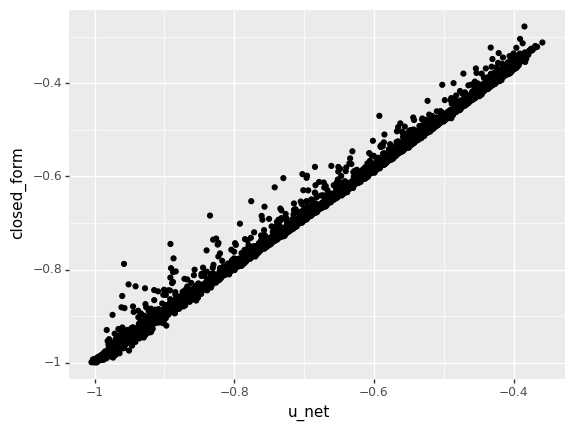

<ggplot: (8752219469889)>

time: 711 ms (started: 2022-07-15 17:10:17 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.0005229535829391298

time: 5.5 ms (started: 2022-07-15 17:10:18 +00:00)


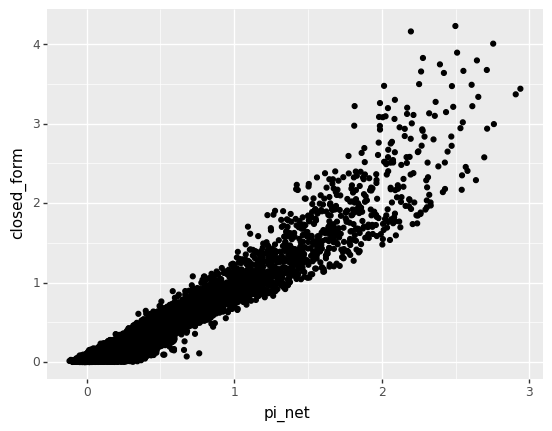

<ggplot: (8752218625197)>

time: 663 ms (started: 2022-07-15 17:10:18 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

0.016631699921385943

time: 5.5 ms (started: 2022-07-15 17:10:18 +00:00)


#### No Lookback With Imp Sampling (gamma 0.5)

In [ ]:
# calculateLossKLMinMaxGamma

seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
max_pi_epochs = 4 # has to be low!!!

#u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net_g = MertonUtilityNet(NL=2, NN=64)
u_net_g.to(torch.device("cuda:0")) 

pi_net_g = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
#pi_net = MertonPiNet(NL=2, NN=64)
pi_net_g.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net_g, pi_net_g, max_pi_epochs, lr_for_pi)
mequation_g.gamma = 0.5
# mequation_g.adapt_pi_epochs = True
# mequation_g.start_adapt_epochs = [ [200, 300, 400, 500, 600, 700, 800], [4, 8, 10 ,20, 40, 60, 70] ]

trainMertonAlloc_g = TrainHJBMertonWithDGM(u_net_g, mequation_g, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 100

trainMertonAlloc_g.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)


  0%|          | 2/2000 [00:00<01:55, 17.35it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 7384.0654296875 - Internal Loss: 1364.5426025390625 - Terminal Loss: 6019.5228271484375


  5%|▌         | 102/2000 [00:06<02:04, 15.19it/s]

Unet Epoch 99 - lr 0.001 - Total Loss: 255.7638702392578 - Internal Loss: 162.47894287109375 - Terminal Loss: 93.28492736816406


 10%|█         | 202/2000 [00:13<02:07, 14.12it/s]

Unet Epoch 199 - lr 0.001 - Total Loss: 268.5108337402344 - Internal Loss: 160.09703063964844 - Terminal Loss: 108.41380310058594


 15%|█▌        | 302/2000 [00:21<02:04, 13.63it/s]

Unet Epoch 299 - lr 0.001 - Total Loss: 215.17930603027344 - Internal Loss: 144.7698516845703 - Terminal Loss: 70.40945434570312


 20%|██        | 402/2000 [00:28<02:04, 12.83it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 168.583740234375 - Internal Loss: 108.13392639160156 - Terminal Loss: 60.44981384277344


 25%|██▌       | 502/2000 [00:36<02:07, 11.74it/s]

Unet Epoch 499 - lr 0.001 - Total Loss: 223.6404266357422 - Internal Loss: 72.2115707397461 - Terminal Loss: 151.4288558959961


 30%|███       | 602/2000 [00:45<01:57, 11.93it/s]

Unet Epoch 599 - lr 0.001 - Total Loss: 136.19436645507812 - Internal Loss: 58.10612487792969 - Terminal Loss: 78.08824157714844


 35%|███▌      | 702/2000 [00:54<01:53, 11.40it/s]

Unet Epoch 699 - lr 0.001 - Total Loss: 94.8536605834961 - Internal Loss: 49.55889129638672 - Terminal Loss: 45.294769287109375


 40%|████      | 802/2000 [01:03<01:49, 10.93it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 70.00340270996094 - Internal Loss: 43.735225677490234 - Terminal Loss: 26.268177032470703


 45%|████▌     | 900/2000 [01:13<01:47, 10.23it/s]

Unet Epoch 899 - lr 0.001 - Total Loss: 133.09915161132812 - Internal Loss: 36.62154006958008 - Terminal Loss: 96.47761154174805


 50%|█████     | 1002/2000 [01:23<01:40,  9.98it/s]

Unet Epoch 999 - lr 0.001 - Total Loss: 71.03450012207031 - Internal Loss: 41.26240539550781 - Terminal Loss: 29.7720947265625


 55%|█████▌    | 1101/2000 [01:34<01:36,  9.32it/s]

Unet Epoch 1099 - lr 0.001 - Total Loss: 169.16297912597656 - Internal Loss: 36.356258392333984 - Terminal Loss: 132.80672073364258


 60%|██████    | 1201/2000 [01:45<01:37,  8.19it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 104.55411529541016 - Internal Loss: 38.032188415527344 - Terminal Loss: 66.52192687988281


 65%|██████▌   | 1301/2000 [01:57<01:17,  8.97it/s]

Unet Epoch 1299 - lr 0.001 - Total Loss: 74.20109558105469 - Internal Loss: 35.395999908447266 - Terminal Loss: 38.80509567260742


 70%|███████   | 1401/2000 [02:09<01:09,  8.60it/s]

Unet Epoch 1399 - lr 0.001 - Total Loss: 56.48734664916992 - Internal Loss: 38.043983459472656 - Terminal Loss: 18.443363189697266


 75%|███████▌  | 1501/2000 [02:21<01:00,  8.19it/s]

Unet Epoch 1499 - lr 0.001 - Total Loss: 122.1945571899414 - Internal Loss: 37.63582992553711 - Terminal Loss: 84.5587272644043


 80%|████████  | 1601/2000 [02:34<00:50,  7.96it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 108.18730926513672 - Internal Loss: 37.183658599853516 - Terminal Loss: 71.0036506652832


 85%|████████▌ | 1701/2000 [02:47<00:39,  7.61it/s]

Unet Epoch 1699 - lr 0.001 - Total Loss: 76.50981140136719 - Internal Loss: 39.833168029785156 - Terminal Loss: 36.67664337158203


 90%|█████████ | 1801/2000 [03:01<00:26,  7.39it/s]

Unet Epoch 1799 - lr 0.001 - Total Loss: 54.45689010620117 - Internal Loss: 35.67610549926758 - Terminal Loss: 18.780784606933594


 95%|█████████▌| 1901/2000 [03:15<00:13,  7.17it/s]

Unet Epoch 1899 - lr 0.001 - Total Loss: 52.86852264404297 - Internal Loss: 33.603702545166016 - Terminal Loss: 19.264820098876953


100%|██████████| 2000/2000 [03:30<00:00,  9.51it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 57.0745735168457 - Internal Loss: 34.34346389770508 - Terminal Loss: 22.731109619140625
time: 3min 30s (started: 2022-07-15 17:10:18 +00:00)


#### display No Lookback With Imp Results (gamma 0.5)

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 10.2 ms (started: 2022-07-15 17:13:49 +00:00)


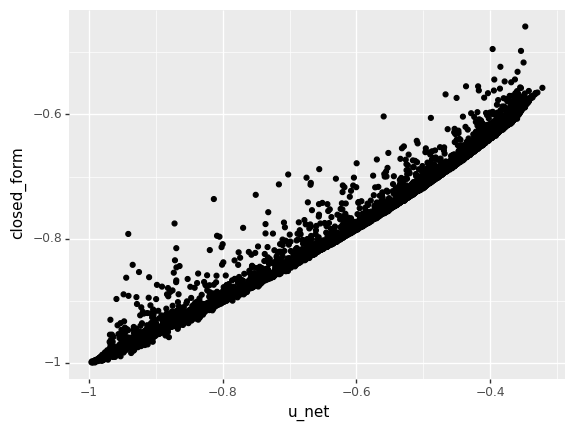

<ggplot: (8752217473745)>

time: 626 ms (started: 2022-07-15 17:13:49 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': np.array(u_net_results), 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.03202711175334124

time: 5.54 ms (started: 2022-07-15 17:13:49 +00:00)


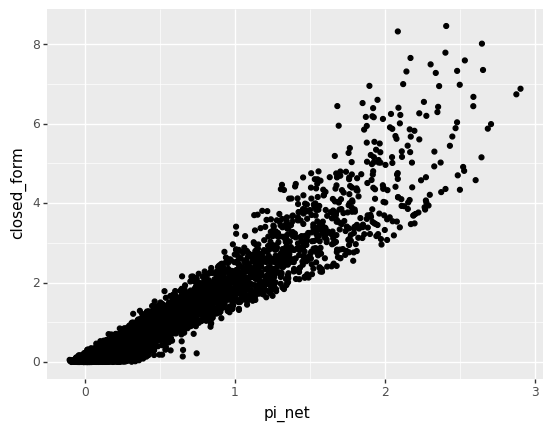

<ggplot: (8752217748365)>

time: 662 ms (started: 2022-07-15 17:13:49 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

0.43178817114050627

time: 5.06 ms (started: 2022-07-15 17:13:50 +00:00)


#### No Lookback With Imp Sampling (gamma 0.1)

In [ ]:
# calculateLossKLMinMaxGamma

seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
max_pi_epochs = 4 # has to be low!!!

#u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net_g = MertonUtilityNet(NL=2, NN=64)
u_net_g.to(torch.device("cuda:0")) 

pi_net_g = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
#pi_net = MertonPiNet(NL=2, NN=64)
pi_net_g.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net_g, pi_net_g, max_pi_epochs, lr_for_pi)
mequation_g.gamma = 0.1
# mequation_g.adapt_pi_epochs = True
# mequation_g.start_adapt_epochs = [ [200, 300, 400, 500, 600, 700, 800], [4, 8, 10 ,20, 40, 60, 70] ]

trainMertonAlloc_g = TrainHJBMertonWithDGM(u_net_g, mequation_g, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 100

trainMertonAlloc_g.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)


  0%|          | 2/2000 [00:00<01:56, 17.12it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 7015.11865234375 - Internal Loss: 1364.5426025390625 - Terminal Loss: 5650.5760498046875


  5%|▌         | 102/2000 [00:06<02:03, 15.36it/s]

Unet Epoch 99 - lr 0.001 - Total Loss: 256.3763732910156 - Internal Loss: 163.97509765625 - Terminal Loss: 92.40127563476562


 10%|█         | 202/2000 [00:13<02:05, 14.35it/s]

Unet Epoch 199 - lr 0.001 - Total Loss: 255.23487854003906 - Internal Loss: 161.59629821777344 - Terminal Loss: 93.63858032226562


 15%|█▌        | 302/2000 [00:20<02:03, 13.72it/s]

Unet Epoch 299 - lr 0.001 - Total Loss: 218.37928771972656 - Internal Loss: 148.0715789794922 - Terminal Loss: 70.30770874023438


 20%|██        | 402/2000 [00:28<02:02, 13.04it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 178.32106018066406 - Internal Loss: 106.57073974609375 - Terminal Loss: 71.75032043457031


 25%|██▌       | 502/2000 [00:36<02:00, 12.48it/s]

Unet Epoch 499 - lr 0.001 - Total Loss: 274.8047790527344 - Internal Loss: 78.11028289794922 - Terminal Loss: 196.69449615478516


 30%|███       | 602/2000 [00:45<02:08, 10.89it/s]

Unet Epoch 599 - lr 0.001 - Total Loss: 127.68697357177734 - Internal Loss: 57.472808837890625 - Terminal Loss: 70.21416473388672


 35%|███▌      | 700/2000 [00:53<01:53, 11.50it/s]

Unet Epoch 699 - lr 0.001 - Total Loss: 138.8657989501953 - Internal Loss: 48.578460693359375 - Terminal Loss: 90.28733825683594


 40%|████      | 800/2000 [01:02<01:50, 10.83it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 157.63726806640625 - Internal Loss: 42.71589279174805 - Terminal Loss: 114.9213752746582


 45%|████▌     | 901/2000 [01:12<01:52,  9.79it/s]

Unet Epoch 899 - lr 0.001 - Total Loss: 113.47052764892578 - Internal Loss: 38.17778015136719 - Terminal Loss: 75.2927474975586


 50%|█████     | 1001/2000 [01:22<01:42,  9.78it/s]

Unet Epoch 999 - lr 0.001 - Total Loss: 104.70628356933594 - Internal Loss: 41.57941818237305 - Terminal Loss: 63.12686538696289


 55%|█████▌    | 1101/2000 [01:34<01:36,  9.33it/s]

Unet Epoch 1099 - lr 0.001 - Total Loss: 88.7476806640625 - Internal Loss: 38.107791900634766 - Terminal Loss: 50.639888763427734


 60%|██████    | 1201/2000 [01:45<01:28,  9.00it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 74.93072509765625 - Internal Loss: 37.215023040771484 - Terminal Loss: 37.715702056884766


 65%|██████▌   | 1301/2000 [01:56<01:20,  8.71it/s]

Unet Epoch 1299 - lr 0.001 - Total Loss: 85.7819595336914 - Internal Loss: 33.4967041015625 - Terminal Loss: 52.285255432128906


 70%|███████   | 1401/2000 [02:09<01:20,  7.48it/s]

Unet Epoch 1399 - lr 0.001 - Total Loss: 76.08617401123047 - Internal Loss: 36.3933219909668 - Terminal Loss: 39.69285202026367


 75%|███████▌  | 1501/2000 [02:22<00:59,  8.32it/s]

Unet Epoch 1499 - lr 0.001 - Total Loss: 58.252532958984375 - Internal Loss: 37.30991744995117 - Terminal Loss: 20.942615509033203


 80%|████████  | 1601/2000 [02:35<00:57,  7.00it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 66.78257751464844 - Internal Loss: 36.38827896118164 - Terminal Loss: 30.394298553466797


 85%|████████▌ | 1701/2000 [02:48<00:42,  7.05it/s]

Unet Epoch 1699 - lr 0.001 - Total Loss: 90.86770629882812 - Internal Loss: 35.21059036254883 - Terminal Loss: 55.6571159362793


 90%|█████████ | 1801/2000 [03:02<00:34,  5.73it/s]

Unet Epoch 1799 - lr 0.001 - Total Loss: 61.088016510009766 - Internal Loss: 32.635318756103516 - Terminal Loss: 28.45269775390625


 95%|█████████▌| 1901/2000 [03:17<00:18,  5.27it/s]

Unet Epoch 1899 - lr 0.001 - Total Loss: 67.78326416015625 - Internal Loss: 35.66129684448242 - Terminal Loss: 32.12196731567383


100%|██████████| 2000/2000 [03:31<00:00,  9.44it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 74.0015869140625 - Internal Loss: 43.679691314697266 - Terminal Loss: 30.321895599365234
time: 3min 31s (started: 2022-07-15 17:13:50 +00:00)


#### display No Lookback With Imp Results (gamma 0.1)

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 8.5 ms (started: 2022-07-15 17:17:22 +00:00)


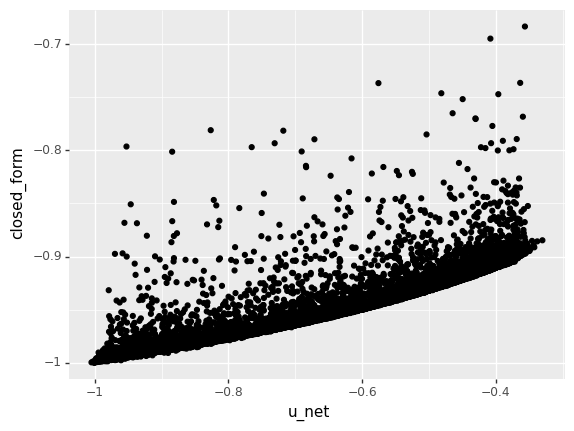

<ggplot: (8752218541545)>

time: 625 ms (started: 2022-07-15 17:17:22 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': np.array(u_net_results), 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.124762079791982

time: 5.49 ms (started: 2022-07-15 17:17:23 +00:00)


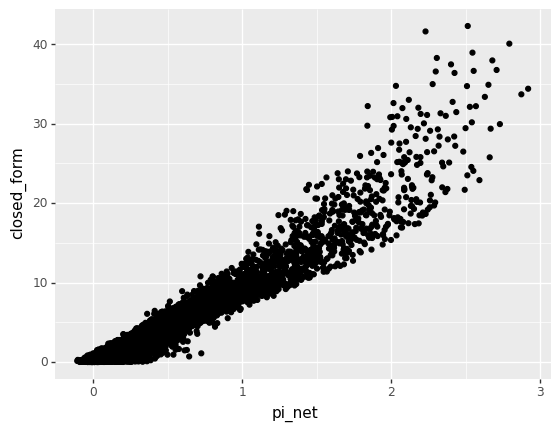

<ggplot: (8752218733337)>

time: 652 ms (started: 2022-07-15 17:17:23 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)


27.97144706257834

time: 5.51 ms (started: 2022-07-15 17:17:23 +00:00)


#### No Lookback With Imp Sampling (gamma 0.01)

In [ ]:
# calculateLossKLMinMaxGamma

seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
max_pi_epochs = 4 # has to be low!!!

#u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net_g = MertonUtilityNet(NL=2, NN=64)
u_net_g.to(torch.device("cuda:0")) 

pi_net_g = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
#pi_net = MertonPiNet(NL=2, NN=64)
pi_net_g.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net_g, pi_net_g, max_pi_epochs, lr_for_pi)
mequation_g.gamma = 0.01
# mequation_g.adapt_pi_epochs = True
# mequation_g.start_adapt_epochs = [ [200, 300, 400, 500, 600, 700, 800], [4, 8, 10 ,20, 40, 60, 70] ]

trainMertonAlloc_g = TrainHJBMertonWithDGM(u_net_g, mequation_g, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 100

trainMertonAlloc_g.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)


  0%|          | 2/2000 [00:00<01:59, 16.73it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 6932.255859375 - Internal Loss: 1364.5426025390625 - Terminal Loss: 5567.7132568359375


  5%|▌         | 102/2000 [00:06<02:02, 15.50it/s]

Unet Epoch 99 - lr 0.001 - Total Loss: 256.5054931640625 - Internal Loss: 164.4749755859375 - Terminal Loss: 92.030517578125


 10%|█         | 202/2000 [00:13<02:03, 14.56it/s]

Unet Epoch 199 - lr 0.001 - Total Loss: 259.1274108886719 - Internal Loss: 161.4957275390625 - Terminal Loss: 97.63168334960938


 15%|█▌        | 302/2000 [00:20<02:05, 13.48it/s]

Unet Epoch 299 - lr 0.001 - Total Loss: 239.82032775878906 - Internal Loss: 151.1855926513672 - Terminal Loss: 88.63473510742188


 20%|██        | 402/2000 [00:28<02:22, 11.25it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 332.30029296875 - Internal Loss: 110.8274917602539 - Terminal Loss: 221.4728012084961


 25%|██▌       | 502/2000 [00:36<02:02, 12.20it/s]

Unet Epoch 499 - lr 0.001 - Total Loss: 146.61666870117188 - Internal Loss: 78.1965560913086 - Terminal Loss: 68.42011260986328


 30%|███       | 602/2000 [00:45<02:00, 11.56it/s]

Unet Epoch 599 - lr 0.001 - Total Loss: 258.412353515625 - Internal Loss: 52.742591857910156 - Terminal Loss: 205.66976165771484


 35%|███▌      | 702/2000 [00:54<01:54, 11.33it/s]

Unet Epoch 699 - lr 0.001 - Total Loss: 171.88502502441406 - Internal Loss: 51.001991271972656 - Terminal Loss: 120.8830337524414


 40%|████      | 802/2000 [01:03<01:51, 10.70it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 83.9198226928711 - Internal Loss: 42.070289611816406 - Terminal Loss: 41.84953308105469


 45%|████▌     | 901/2000 [01:13<01:48, 10.10it/s]

Unet Epoch 899 - lr 0.001 - Total Loss: 74.50303649902344 - Internal Loss: 40.48044204711914 - Terminal Loss: 34.0225944519043


 50%|█████     | 1001/2000 [01:23<01:43,  9.67it/s]

Unet Epoch 999 - lr 0.001 - Total Loss: 75.93343353271484 - Internal Loss: 46.77916717529297 - Terminal Loss: 29.154266357421875


 55%|█████▌    | 1101/2000 [01:34<01:40,  8.94it/s]

Unet Epoch 1099 - lr 0.001 - Total Loss: 90.8333511352539 - Internal Loss: 39.86677169799805 - Terminal Loss: 50.96657943725586


 60%|██████    | 1201/2000 [01:45<01:29,  8.94it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 73.31102752685547 - Internal Loss: 38.12076187133789 - Terminal Loss: 35.19026565551758


 65%|██████▌   | 1301/2000 [01:57<01:20,  8.66it/s]

Unet Epoch 1299 - lr 0.001 - Total Loss: 70.56941223144531 - Internal Loss: 34.4693489074707 - Terminal Loss: 36.10006332397461


 70%|███████   | 1401/2000 [02:09<01:10,  8.51it/s]

Unet Epoch 1399 - lr 0.001 - Total Loss: 86.30380249023438 - Internal Loss: 36.910926818847656 - Terminal Loss: 49.39287567138672


 75%|███████▌  | 1501/2000 [02:22<01:03,  7.89it/s]

Unet Epoch 1499 - lr 0.001 - Total Loss: 73.19182586669922 - Internal Loss: 37.63169479370117 - Terminal Loss: 35.56013107299805


 80%|████████  | 1601/2000 [02:35<00:51,  7.73it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 81.29743194580078 - Internal Loss: 38.08056640625 - Terminal Loss: 43.21686553955078


 85%|████████▌ | 1701/2000 [02:48<00:39,  7.60it/s]

Unet Epoch 1699 - lr 0.001 - Total Loss: 56.503604888916016 - Internal Loss: 38.12324142456055 - Terminal Loss: 18.38036346435547


 90%|█████████ | 1801/2000 [03:03<00:27,  7.27it/s]

Unet Epoch 1799 - lr 0.001 - Total Loss: 60.55648422241211 - Internal Loss: 33.91016387939453 - Terminal Loss: 26.646320343017578


 95%|█████████▌| 1901/2000 [03:17<00:14,  6.99it/s]

Unet Epoch 1899 - lr 0.001 - Total Loss: 104.89867401123047 - Internal Loss: 43.369293212890625 - Terminal Loss: 61.529380798339844


100%|██████████| 2000/2000 [03:32<00:00,  9.43it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 50.78186798095703 - Internal Loss: 34.5774040222168 - Terminal Loss: 16.204463958740234
time: 3min 32s (started: 2022-07-15 17:17:23 +00:00)


#### display No Lookback With Imp Results (gamma 0.01)

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 7.61 ms (started: 2022-07-15 17:20:56 +00:00)


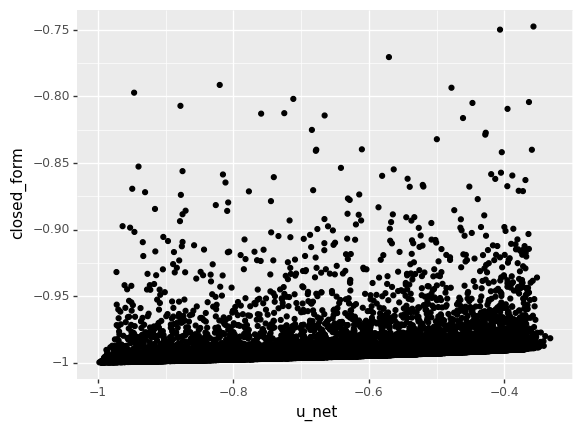

<ggplot: (8752219519013)>

time: 654 ms (started: 2022-07-15 17:20:56 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': np.array(u_net_results), 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.1671358718055677

time: 5.64 ms (started: 2022-07-15 17:20:56 +00:00)


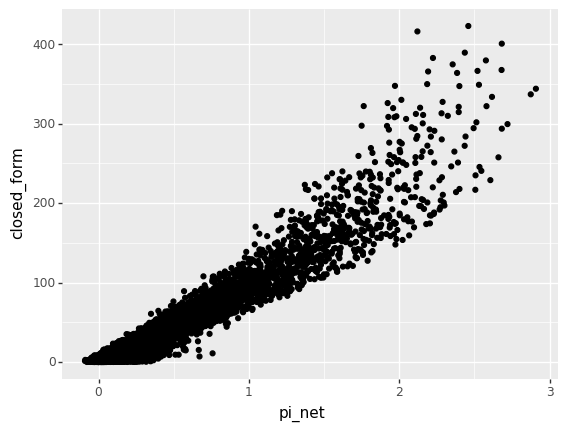

<ggplot: (8752218481113)>

time: 670 ms (started: 2022-07-15 17:20:56 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)


3352.0988013107435

time: 5.18 ms (started: 2022-07-15 17:20:57 +00:00)


#### No Lookback With Imp Sampling (gamma 10.0)

In [ ]:
# calculateLossKLMinMaxGamma

seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
max_pi_epochs = 4 # has to be low!!!

#u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net_g = MertonUtilityNet(NL=2, NN=64)
u_net_g.to(torch.device("cuda:0")) 

pi_net_g = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
#pi_net = MertonPiNet(NL=2, NN=64)
pi_net_g.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net_g, pi_net_g, max_pi_epochs, lr_for_pi)
mequation_g.gamma = 10.0
# mequation_g.adapt_pi_epochs = True
# mequation_g.start_adapt_epochs = [ [200, 300, 400, 500, 600, 700, 800], [4, 8, 10 ,20, 40, 60, 70] ]

trainMertonAlloc_g = TrainHJBMertonWithDGM(u_net_g, mequation_g, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 100

trainMertonAlloc_g.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)


  0%|          | 2/2000 [00:00<02:02, 16.31it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 11296.166015625 - Internal Loss: 1364.5426025390625 - Terminal Loss: 9931.623413085938


  5%|▌         | 102/2000 [00:06<02:05, 15.12it/s]

Unet Epoch 99 - lr 0.001 - Total Loss: 284.42193603515625 - Internal Loss: 160.78948974609375 - Terminal Loss: 123.6324462890625


 10%|█         | 202/2000 [00:13<02:06, 14.21it/s]

Unet Epoch 199 - lr 0.001 - Total Loss: 294.8712463378906 - Internal Loss: 163.932373046875 - Terminal Loss: 130.93887329101562


 15%|█▌        | 302/2000 [00:21<02:07, 13.30it/s]

Unet Epoch 299 - lr 0.001 - Total Loss: 281.0230407714844 - Internal Loss: 156.19517517089844 - Terminal Loss: 124.82786560058594


 20%|██        | 402/2000 [00:28<02:03, 12.93it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 193.45994567871094 - Internal Loss: 101.51024627685547 - Terminal Loss: 91.94969940185547


 25%|██▌       | 502/2000 [00:36<02:01, 12.32it/s]

Unet Epoch 499 - lr 0.001 - Total Loss: 344.5588684082031 - Internal Loss: 77.21257019042969 - Terminal Loss: 267.34629821777344


 30%|███       | 602/2000 [00:45<01:59, 11.72it/s]

Unet Epoch 599 - lr 0.001 - Total Loss: 283.1294250488281 - Internal Loss: 68.24626922607422 - Terminal Loss: 214.8831558227539


 35%|███▌      | 701/2000 [00:54<01:56, 11.10it/s]

Unet Epoch 699 - lr 0.001 - Total Loss: 121.29296875 - Internal Loss: 59.73357391357422 - Terminal Loss: 61.55939483642578


 40%|████      | 802/2000 [01:04<01:53, 10.58it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 88.02769470214844 - Internal Loss: 52.806270599365234 - Terminal Loss: 35.2214241027832


 45%|████▌     | 902/2000 [01:14<01:46, 10.30it/s]

Unet Epoch 899 - lr 0.001 - Total Loss: 111.58863830566406 - Internal Loss: 47.05049133300781 - Terminal Loss: 64.53814697265625


 50%|█████     | 1001/2000 [01:24<01:40,  9.90it/s]

Unet Epoch 999 - lr 0.001 - Total Loss: 95.6683120727539 - Internal Loss: 45.396060943603516 - Terminal Loss: 50.27225112915039


 55%|█████▌    | 1101/2000 [01:34<01:36,  9.30it/s]

Unet Epoch 1099 - lr 0.001 - Total Loss: 93.0106201171875 - Internal Loss: 40.71986389160156 - Terminal Loss: 52.29075622558594


 60%|██████    | 1201/2000 [01:46<01:28,  9.00it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 92.71034240722656 - Internal Loss: 39.22468566894531 - Terminal Loss: 53.48565673828125


 65%|██████▌   | 1301/2000 [01:57<01:20,  8.72it/s]

Unet Epoch 1299 - lr 0.001 - Total Loss: 89.16061401367188 - Internal Loss: 35.654335021972656 - Terminal Loss: 53.50627899169922


 70%|███████   | 1401/2000 [02:09<01:11,  8.42it/s]

Unet Epoch 1399 - lr 0.001 - Total Loss: 90.29443359375 - Internal Loss: 36.906124114990234 - Terminal Loss: 53.388309478759766


 75%|███████▌  | 1501/2000 [02:22<01:00,  8.23it/s]

Unet Epoch 1499 - lr 0.001 - Total Loss: 97.60256958007812 - Internal Loss: 36.918731689453125 - Terminal Loss: 60.683837890625


 80%|████████  | 1601/2000 [02:34<00:50,  7.91it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 87.67939758300781 - Internal Loss: 35.8703727722168 - Terminal Loss: 51.809024810791016


 85%|████████▌ | 1701/2000 [02:48<00:43,  6.93it/s]

Unet Epoch 1699 - lr 0.001 - Total Loss: 86.4304428100586 - Internal Loss: 34.65547561645508 - Terminal Loss: 51.774967193603516


 90%|█████████ | 1801/2000 [03:02<00:26,  7.41it/s]

Unet Epoch 1799 - lr 0.001 - Total Loss: 49.65146255493164 - Internal Loss: 35.51358413696289 - Terminal Loss: 14.13787841796875


 95%|█████████▌| 1901/2000 [03:16<00:13,  7.32it/s]

Unet Epoch 1899 - lr 0.001 - Total Loss: 48.88888931274414 - Internal Loss: 33.55192565917969 - Terminal Loss: 15.336963653564453


100%|██████████| 2000/2000 [03:30<00:00,  9.49it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 91.33480834960938 - Internal Loss: 28.852453231811523 - Terminal Loss: 62.48235511779785
time: 3min 30s (started: 2022-07-15 17:20:57 +00:00)


#### display No Lookback With Imp Results (gamma 10.0)

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 8.8 ms (started: 2022-07-15 17:24:28 +00:00)


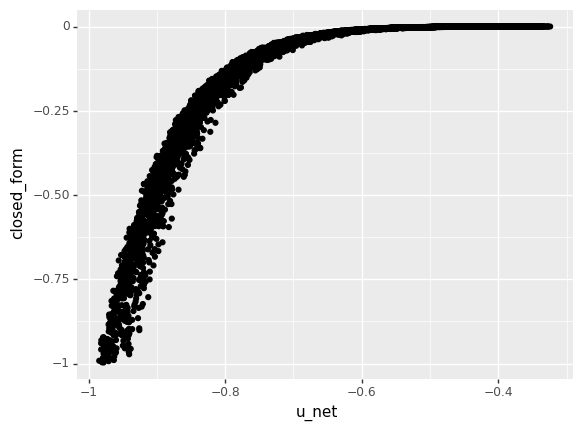

<ggplot: (8752241702353)>

time: 610 ms (started: 2022-07-15 17:24:28 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': np.array(u_net_results), 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.2681865528499841

time: 4.71 ms (started: 2022-07-15 17:24:28 +00:00)


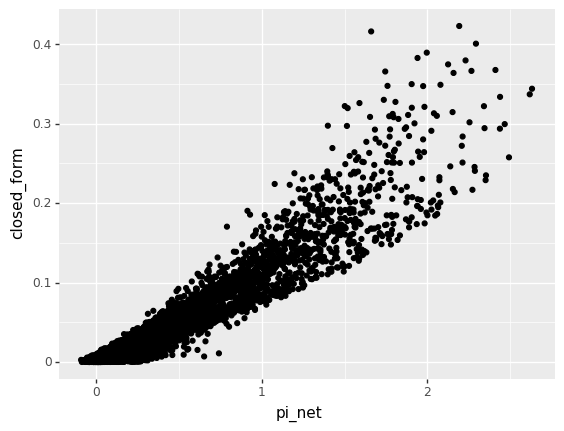

<ggplot: (8752242655901)>

time: 643 ms (started: 2022-07-15 17:24:28 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)


0.1844153612973471

time: 5.2 ms (started: 2022-07-15 17:24:29 +00:00)


#### No Lookback With Imp Sampling (gamma 1e-5)

In [ ]:
# calculateLossKLMinMaxGamma

seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
max_pi_epochs = 4 # has to be low!!!

#u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net_g = MertonUtilityNet(NL=2, NN=64)
u_net_g.to(torch.device("cuda:0")) 

pi_net_g = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
#pi_net = MertonPiNet(NL=2, NN=64)
pi_net_g.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net_g, pi_net_g, max_pi_epochs, lr_for_pi)
mequation_g.gamma = 1e-5
# mequation_g.adapt_pi_epochs = True
# mequation_g.start_adapt_epochs = [ [200, 300, 400, 500, 600, 700, 800], [4, 8, 10 ,20, 40, 60, 70] ]

trainMertonAlloc_g = TrainHJBMertonWithDGM(u_net_g, mequation_g, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 100

trainMertonAlloc_g.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)


  0%|          | 2/2000 [00:00<01:53, 17.63it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 7033.32373046875 - Internal Loss: 1364.5426025390625 - Terminal Loss: 5668.7811279296875


  5%|▌         | 102/2000 [00:06<02:01, 15.60it/s]

Unet Epoch 99 - lr 0.001 - Total Loss: 238.41854858398438 - Internal Loss: 164.5651397705078 - Terminal Loss: 73.85340881347656


 10%|█         | 202/2000 [00:13<02:01, 14.74it/s]

Unet Epoch 199 - lr 0.001 - Total Loss: 238.41854858398438 - Internal Loss: 161.45069885253906 - Terminal Loss: 76.96784973144531


 15%|█▌        | 302/2000 [00:20<02:04, 13.68it/s]

Unet Epoch 299 - lr 0.001 - Total Loss: 119.20928192138672 - Internal Loss: 148.31082153320312 - Terminal Loss: -29.101539611816406


 20%|██        | 402/2000 [00:28<02:06, 12.66it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 238.41854858398438 - Internal Loss: 103.38792419433594 - Terminal Loss: 135.03062438964844


 25%|██▌       | 502/2000 [00:36<02:02, 12.21it/s]

Unet Epoch 499 - lr 0.001 - Total Loss: 238.41854858398438 - Internal Loss: 83.41975402832031 - Terminal Loss: 154.99879455566406


 30%|███       | 601/2000 [00:45<02:16, 10.25it/s]

Unet Epoch 599 - lr 0.001 - Total Loss: 238.41854858398438 - Internal Loss: 58.60057830810547 - Terminal Loss: 179.8179702758789


 35%|███▌      | 701/2000 [00:54<01:57, 11.09it/s]

Unet Epoch 699 - lr 0.001 - Total Loss: 119.20928192138672 - Internal Loss: 50.01471710205078 - Terminal Loss: 69.19456481933594


 40%|████      | 801/2000 [01:04<01:53, 10.53it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 47.608848571777344 - Terminal Loss: -47.608848571777344


 45%|████▌     | 901/2000 [01:14<01:53,  9.69it/s]

Unet Epoch 899 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 40.09605026245117 - Terminal Loss: -40.09605026245117


 50%|█████     | 1001/2000 [01:25<01:44,  9.57it/s]

Unet Epoch 999 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 43.84486770629883 - Terminal Loss: -43.84486770629883


 55%|█████▌    | 1101/2000 [01:36<01:37,  9.25it/s]

Unet Epoch 1099 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 36.00358200073242 - Terminal Loss: -36.00358200073242


 60%|██████    | 1201/2000 [01:47<01:26,  9.20it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 38.37370681762695 - Terminal Loss: -38.37370681762695


 65%|██████▌   | 1301/2000 [01:59<01:19,  8.79it/s]

Unet Epoch 1299 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 33.7525520324707 - Terminal Loss: -33.7525520324707


 70%|███████   | 1401/2000 [02:11<01:11,  8.37it/s]

Unet Epoch 1399 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 39.82377243041992 - Terminal Loss: -39.82377243041992


 75%|███████▌  | 1501/2000 [02:24<01:05,  7.57it/s]

Unet Epoch 1499 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 38.36711502075195 - Terminal Loss: -38.36711502075195


 80%|████████  | 1601/2000 [02:37<00:51,  7.77it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 42.25415802001953 - Terminal Loss: -42.25415802001953


 85%|████████▌ | 1701/2000 [02:50<00:39,  7.58it/s]

Unet Epoch 1699 - lr 0.001 - Total Loss: 119.20928192138672 - Internal Loss: 35.96110916137695 - Terminal Loss: 83.24817276000977


 90%|█████████ | 1801/2000 [03:04<00:27,  7.35it/s]

Unet Epoch 1799 - lr 0.001 - Total Loss: 119.20928192138672 - Internal Loss: 30.515771865844727 - Terminal Loss: 88.69351005554199


 95%|█████████▌| 1901/2000 [03:18<00:13,  7.18it/s]

Unet Epoch 1899 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 35.67692947387695 - Terminal Loss: -35.67692947387695


100%|██████████| 2000/2000 [03:33<00:00,  9.36it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 0.0 - Internal Loss: 37.04609680175781 - Terminal Loss: -37.04609680175781
time: 3min 33s (started: 2022-07-15 17:24:29 +00:00)


#### display No Lookback With Imp Results (gamma 1e-5)

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 7.55 ms (started: 2022-07-15 17:28:03 +00:00)


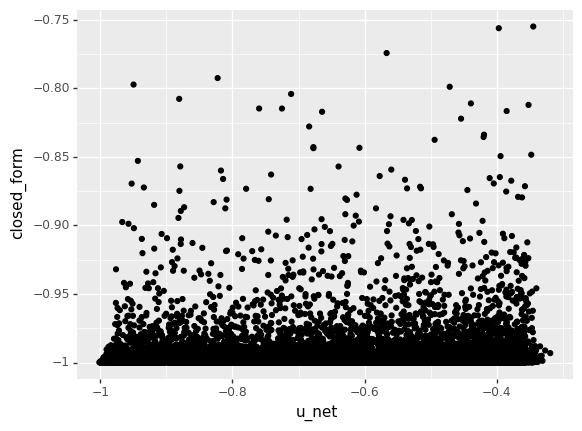

<ggplot: (8752241725113)>

time: 668 ms (started: 2022-07-15 17:28:03 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': np.array(u_net_results), 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.17501555381664244

time: 6 ms (started: 2022-07-15 17:28:03 +00:00)


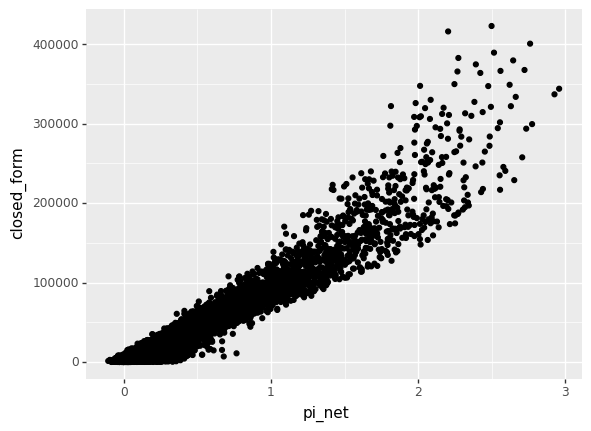

<ggplot: (8752219427741)>

time: 878 ms (started: 2022-07-15 17:28:03 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

3414946787.601061

time: 5.29 ms (started: 2022-07-15 17:28:04 +00:00)


#### No Lookback With Imp Sampling (gamma 1.0)

In [ ]:
# calculateLossKLMinMaxGamma

seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
max_pi_epochs = 4 # has to be low!!!

#u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net_g = MertonUtilityNet(NL=2, NN=64)
u_net_g.to(torch.device("cuda:0")) 

pi_net_g = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
#pi_net = MertonPiNet(NL=2, NN=64)
pi_net_g.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net_g, pi_net_g, max_pi_epochs, lr_for_pi)
mequation_g.gamma = 1.0
# mequation_g.adapt_pi_epochs = True
# mequation_g.start_adapt_epochs = [ [200, 300, 400, 500, 600, 700, 800], [4, 8, 10 ,20, 40, 60, 70] ]

trainMertonAlloc_g = TrainHJBMertonWithDGM(u_net_g, mequation_g, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 100

trainMertonAlloc_g.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)


#### display No Lookback With Imp Results (gamma 1.0)

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': np.array(u_net_results), 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)


#### Lookback With Imp Sampling (gamma), Pi epochs schedule 1

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
# lr = 0.0005
# lr_for_pi = 0.0001
max_pi_epochs = 4 # has to be low!!!

# u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=20 )
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.to(torch.device("cuda:0")) 

# pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=10 )
pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
pi_net.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
mequation_g.MIN_SIGMA = 0.02
mequation_g.adapt_pi_epochs = True
mequation_g.gamma = 0.5
mequation_g.adapt_pi_epochs = True
mequation_g.start_adapt_epochs = [ [200, 300, 400, 500, 600, 700, 800], [4, 8, 10 ,20, 40, 60, 70] ]


# trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g = TrainHJBMertonWithDGMLB(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 400
trainMertonAlloc_g.use_early_stop = False
trainMertonAlloc_g.early_stop_patience = 1000

# trainMertonAlloc.train(epoch = 10000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)
trainMertonAlloc_g.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)

# trainMertonAlloc.train(epoch = 30000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, key_loss_func=torch.abs)


  0%|          | 1/2000 [00:00<04:52,  6.82it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 7857.6298828125 - Internal Loss: 1401.8682861328125 - Terminal Loss: 6455.7615966796875


 20%|██        | 401/2000 [01:29<04:22,  6.08it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 139.3999481201172 - Internal Loss: 40.444183349609375 - Terminal Loss: 98.95576477050781


 40%|████      | 801/2000 [02:46<03:35,  5.56it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 103.87995147705078 - Internal Loss: 36.29659652709961 - Terminal Loss: 67.58335494995117


 60%|██████    | 1200/2000 [04:07<02:41,  4.94it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 179.498779296875 - Internal Loss: 34.5015983581543 - Terminal Loss: 144.9971809387207


 80%|████████  | 1600/2000 [05:41<04:29,  1.49it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 56.30585861206055 - Internal Loss: 38.57769012451172 - Terminal Loss: 17.728168487548828


100%|██████████| 2000/2000 [07:18<00:00,  4.56it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 51.18836212158203 - Internal Loss: 31.453874588012695 - Terminal Loss: 19.734487533569336
time: 7min 18s (started: 2022-07-15 17:28:04 +00:00)


In [ ]:
# save_model_final(training, eqObject, lr, eqLossFn, sample_method, batch_size)
save_model_final(trainMertonAlloc_g, mequation_g, lr, eqLossFn , sample_method, 2048)

time: 27.9 ms (started: 2022-07-15 17:35:23 +00:00)


#### display Lookback With Imp Sampling (gamma), Pi epochs schedule 1

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 8.12 ms (started: 2022-07-15 17:35:23 +00:00)


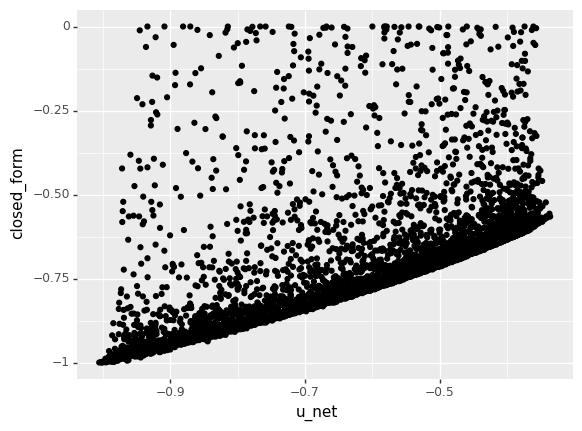

<ggplot: (8752219440949)>

time: 661 ms (started: 2022-07-15 17:35:23 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': np.array(u_net_results), 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.03381579619702446

time: 5.14 ms (started: 2022-07-15 17:35:24 +00:00)


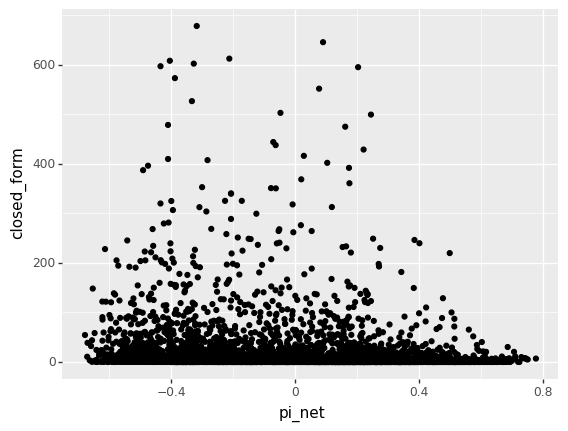

<ggplot: (8752241860157)>

time: 645 ms (started: 2022-07-15 17:35:24 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

1534.7391120400898

time: 5.93 ms (started: 2022-07-15 17:35:24 +00:00)


#### Lookback With Imp Sampling (gamma), Pi epochs schedule 2

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
# lr = 0.0005
# lr_for_pi = 0.0001
max_pi_epochs = 4 # has to be low!!!

# u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=20 )
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.to(torch.device("cuda:0")) 

# pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=10 )
pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
pi_net.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
mequation_g.MIN_SIGMA = 0.02
mequation_g.adapt_pi_epochs = True
mequation_g.gamma = 0.5
mequation_g.adapt_pi_epochs = True
mequation_g.start_adapt_epochs = [ [1000], [4] ]


# trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g = TrainHJBMertonWithDGMLB(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 400
trainMertonAlloc_g.use_early_stop = False
trainMertonAlloc_g.early_stop_patience = 1000

# trainMertonAlloc.train(epoch = 10000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)
trainMertonAlloc_g.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)

# trainMertonAlloc.train(epoch = 30000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, key_loss_func=torch.abs)


  0%|          | 1/2000 [00:00<08:03,  4.14it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 7856.16943359375 - Internal Loss: 1399.4852294921875 - Terminal Loss: 6456.6842041015625


 20%|██        | 400/2000 [02:06<10:20,  2.58it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 89.72209167480469 - Internal Loss: 46.777427673339844 - Terminal Loss: 42.944664001464844


 40%|████      | 800/2000 [04:00<05:30,  3.63it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 106.82777404785156 - Internal Loss: 36.02550506591797 - Terminal Loss: 70.8022689819336


 60%|██████    | 1200/2000 [06:04<03:57,  3.37it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 61.068843841552734 - Internal Loss: 35.78971481323242 - Terminal Loss: 25.279129028320312


 80%|████████  | 1600/2000 [08:14<02:05,  3.18it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 83.2858657836914 - Internal Loss: 37.762874603271484 - Terminal Loss: 45.52299118041992


100%|██████████| 2000/2000 [10:36<00:00,  3.14it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 81.97235107421875 - Internal Loss: 46.3293571472168 - Terminal Loss: 35.64299392700195
time: 10min 36s (started: 2022-07-15 17:35:24 +00:00)


In [ ]:
# save_model_final(training, eqObject, lr, eqLossFn, sample_method, batch_size)
save_model_final(trainMertonAlloc_g, mequation_g, lr, eqLossFn , sample_method, 2048)

time: 28.5 ms (started: 2022-07-15 17:46:01 +00:00)


#### display Lookback With Imp Sampling (gamma), Pi epochs schedule 2

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 7.81 ms (started: 2022-07-15 17:46:01 +00:00)


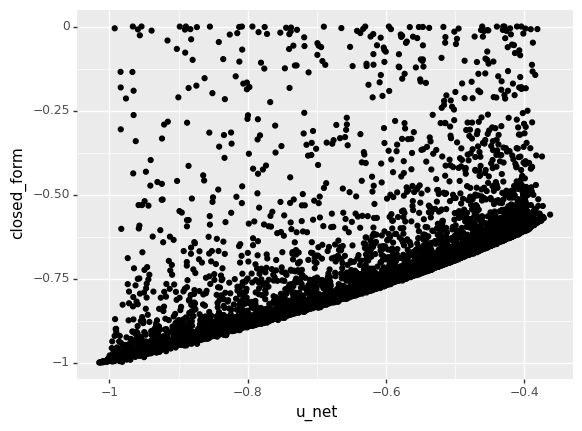

<ggplot: (8752241628085)>

time: 635 ms (started: 2022-07-15 17:46:01 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': np.array(u_net_results), 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.02843755868428885

time: 6 ms (started: 2022-07-15 17:46:02 +00:00)


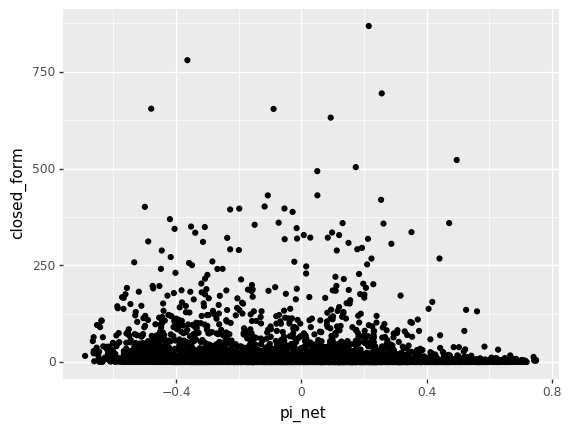

<ggplot: (8752311017749)>

time: 634 ms (started: 2022-07-15 17:46:02 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

1477.2017628172837

time: 5.78 ms (started: 2022-07-15 17:46:03 +00:00)


#### Lookback With Imp Sampling (gamma), Pi epochs schedule 2, Pi LR schedule 1

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
# lr = 0.0005
# lr_for_pi = 0.0001
max_pi_epochs = 4 # has to be low!!!

# u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=20 )
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.to(torch.device("cuda:0")) 

# pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=10 )
pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
pi_net.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
mequation_g.MIN_SIGMA = 0.02
mequation_g.gamma = 0.5
mequation_g.adapt_pi_epochs = True
mequation_g.start_adapt_epochs = [ [1000], [4] ]
mequation_g.adapt_pi_lr = True
mequation_g.start_adapt_pi_lr = [ [100,200,400,800], [0.1, 0.05,0.01, 0.001] ]

# trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g = TrainHJBMertonWithDGMLB(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 400
trainMertonAlloc_g.use_early_stop = False
trainMertonAlloc_g.early_stop_patience = 1000

# trainMertonAlloc.train(epoch = 10000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)
trainMertonAlloc_g.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)

# trainMertonAlloc.train(epoch = 30000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, key_loss_func=torch.abs)


  0%|          | 1/2000 [00:00<11:04,  3.01it/s]

Unet Epoch 0 - lr 0.001 - Total Loss: 7856.3583984375 - Internal Loss: 1399.7725830078125 - Terminal Loss: 6456.5858154296875


 20%|██        | 400/2000 [02:47<09:33,  2.79it/s]

Unet Epoch 399 - lr 0.001 - Total Loss: 141.48757934570312 - Internal Loss: 42.556976318359375 - Terminal Loss: 98.93060302734375


 40%|████      | 800/2000 [05:25<07:16,  2.75it/s]

Unet Epoch 799 - lr 0.001 - Total Loss: 100.94070434570312 - Internal Loss: 37.20081329345703 - Terminal Loss: 63.739891052246094


 60%|██████    | 1200/2000 [08:08<06:00,  2.22it/s]

Unet Epoch 1199 - lr 0.001 - Total Loss: 87.57281494140625 - Internal Loss: 37.2329216003418 - Terminal Loss: 50.33989334106445


 80%|████████  | 1600/2000 [11:06<02:44,  2.43it/s]

Unet Epoch 1599 - lr 0.001 - Total Loss: 131.67214965820312 - Internal Loss: 31.33268165588379 - Terminal Loss: 100.33946800231934


100%|██████████| 2000/2000 [14:10<00:00,  2.35it/s]

Unet Epoch 1999 - lr 0.001 - Total Loss: 142.77919006347656 - Internal Loss: 43.204341888427734 - Terminal Loss: 99.57484817504883
time: 14min 10s (started: 2022-07-15 17:46:03 +00:00)


In [ ]:
# save_model_final(training, eqObject, lr, eqLossFn, sample_method, batch_size)
save_model_final(trainMertonAlloc_g, mequation_g, lr, eqLossFn , sample_method, 2048)

time: 27.6 ms (started: 2022-07-15 18:00:13 +00:00)


#### display Lookback With Imp Sampling (gamma), Pi epochs schedule 2, Pi LR schedule 1

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 7.73 ms (started: 2022-07-15 18:00:13 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': np.array(u_net_results)), 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

SyntaxError: ignored

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

#### Lookback With Imp Sampling (gamma), Pi LR schedule 1

In [ ]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLossKLMinMaxGamma'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-5
# lr = 0.0005
# lr_for_pi = 0.0001
max_pi_epochs = 4 # has to be low!!!

# u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=20 )
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.to(torch.device("cuda:0")) 

# pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=10 )
pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
pi_net.to(torch.device("cuda:0"))

mequation_g = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
mequation_g.MIN_SIGMA = 0.02
mequation_g.gamma = 0.5
# mequation_g.adapt_pi_epochs = True
# mequation_g.start_adapt_epochs = [ [1000], [4] ]
mequation_g.adapt_pi_lr = True
mequation_g.start_adapt_pi_lr = [ [100,200,400,800], [0.1, 0.05,0.01, 0.001] ]

# trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g = TrainHJBMertonWithDGMLB(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc_g.hook_interval = 400
trainMertonAlloc_g.use_early_stop = False
trainMertonAlloc_g.early_stop_patience = 1000

# trainMertonAlloc.train(epoch = 10000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)
trainMertonAlloc_g.train(epoch = 2000, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs)

# trainMertonAlloc.train(epoch = 30000 , lr = lr, eqLossFn = eqLossFn , sample_method_X = sample_method, key_loss_func=torch.abs)


In [ ]:
# save_model_final(training, eqObject, lr, eqLossFn, sample_method, batch_size)
save_model_final(trainMertonAlloc_g, mequation_g, lr, eqLossFn , sample_method, 2048)

#### display Lookback With Imp Sampling (gamma), Pi LR schedule 1

In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = mequation_g.gamma
internal_sample, terminal_sample = mequation_g.sample(size=10000, to_cpu=False)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc_g.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': np.exp(np.array(u_net_results)), 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation_g.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

### Later

In [ ]:
# load up the data

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 1e-3
lr_for_pi = 1e-3
max_pi_epochs = 4 # has to be low!!!

# u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=20 )
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.to(torch.device("cuda:0")) 

# pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 20, depth=10 )
pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
pi_net.to(torch.device("cuda:0"))

u_net.load_state_dict(torch.load(os.path.join(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", 
                                              'MertonEquation_20220714062040_2048_calculateLoss_U_0p001_U64_U2_P64_P2_U')))

pi_net.load_state_dict(torch.load(os.path.join(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/", 
                                              'MertonEquation_20220714062040_2048_calculateLoss_U_0p001_U64_U2_P64_P2_P')))

mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
mequation.MIN_SIGMA = 0.02
mequation.adapt_pi_epochs = True

# trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc = TrainHJBMertonWithDGMLB(u_net, mequation, BATCH_SIZE=2048, debug=False )
trainMertonAlloc.hook_interval = 400
trainMertonAlloc.use_early_stop = False
trainMertonAlloc.early_stop_patience = 1000



time: 35.1 ms (started: 2022-07-14 17:06:57 +00:00)


In [ ]:
######## Only train PI from now ?
from pprint import pprint as pp

gamma = 1
internal_sample, terminal_sample = mequation.sample(size=10, to_cpu=False)
internal_sample.requires_grad = True

# internal_sample = internal_sample[internal_sample[:,4] > 0.2] 
# terminal_sample = terminal_sample[terminal_sample[:,4] > 0.2]

u_net_val = u_net(internal_sample)
#print(torch.mean(u_net_val), torch.min(u_net_val), torch.max(u_net_val))

du = torch.autograd.grad( u_net_val, 
                          internal_sample,
                          grad_outputs=torch.ones_like(u_net_val),
                          create_graph=True)


du_dt = du[0][:,0].reshape(-1,1)
du_dx = du[0][:,1].reshape(-1,1) 
# du_dx.requires_grad=True
# du[0].requires_grad = True
pp(du_dx)
# pp(du[0])
# du_dx.backward(torch.ones_like(du_dx))

d2u_dx2 = torch.autograd.grad(du_dx, 
                              internal_sample , 
                              grad_outputs=torch.ones_like(du_dx),
                              allow_unused=False,
                              create_graph=False, 
                              )[0][:,1].reshape(-1,1)

pp(d2u_dx2)

pi_model = PiEquation(pi_net, du_dx.detach(), d2u_dx2.detach())
pi_model.curr_epoch = 0

pi_net_epoch = 2000
pi_trainer = TrainInternalPiWithDGM(mequation, pi_model, 
                                    internal_sample.shape[0], 
                                    pi_net_epoch, 
                                    lr_for_pi, 
                                    debug=True, 
                                    loss_multiply=1.0)
pi_trainer.print = True
pi_trainer.use_early_stop = True
pi_trainer.early_stop_patience = 3 # min(10,math.ceil(pi_net_epoch/2.0))        
pi_trainer.train(sample_batch=(internal_sample, terminal_sample))

# 


# du_dt, du_dx, d2u_dx2 = mequation.get_utility_function_derivatives(u_net_val, internal_sample)
#print('Unet derivatives shape:', du_dt.shape, du_dx.shape, d2u_dx2.shape)



tensor([[0.9976],
        [0.4905],
        [0.7303],
        [0.6100],
        [0.1629],
        [0.7977],
        [1.0736],
        [0.4706],
        [0.5782],
        [0.6734]], device='cuda:0', grad_fn=<ReshapeAliasBackward0>)
tensor([[-0.9572],
        [-1.3354],
        [-0.8237],
        [-0.6155],
        [-0.2930],
        [-0.6671],
        [-2.5934],
        [-0.4897],
        [-0.6296],
        [-0.7691]], device='cuda:0')
Pi Net Epoch 0 Loss -568.31598
Pi Net Epoch 1 Loss -582.03052
Pi Net Epoch 2 Loss -600.52551
Pi Net Epoch 3 Loss -616.74921
Pi Net Epoch 4 Loss -629.9671
Pi Net Epoch 5 Loss -640.10193
Pi Net Epoch 6 Loss -640.65381
Pi Net Epoch 7 Loss -629.96051
Pi Net Epoch 8 Loss -629.27179
Pi Net Epoch 9 Loss -637.45679
Pi Net Epoch 10 Loss -644.13055
Pi Net Epoch 11 Loss -647.11975
Pi Net Epoch 12 Loss -647.88544
Pi Net Epoch 13 Loss -647.39844
Pi Net Epoch 14 Loss -646.4989
Pi Net Epoch 15 Loss -646.01501
Pi Net Epoch 16 Loss -646.15063
Pi Net Epoch 17 Loss -646.515

In [ ]:
def attach_pi_used(x, pi_net, requires_grad=True):
  pi_used = pi_net(x)  
  # pi_used = pi_used[:,0].reshape(-1,1)
  pi_used = pi_used.detach().reshape(-1,1)
  
  before_x = x.detach().clone()
  new_x =  Variable(torch.cat((x, pi_used), dim=1), requires_grad=requires_grad)
  return before_x, new_x

time: 3.65 ms (started: 2022-07-14 17:11:01 +00:00)


List of params for successfull run



*   Loss = L1
*   Util Net + piNet: depth = 3, NN= 50
*   lr = 0.005
*   lr_for_pi = 0.002
*   max_pi_epochs = 5
*   trainMertonAlloc.use_early_stop = False
*   epoch = 6100
*   loss weights = 1\*intC + 1\*terminal







In [ ]:
def Htx(x, gamma=1):
    # 3.6a in https://arxiv.org/abs/1912.01455v3
    #  wealth * gamma * exp(r*tau)
    part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
    #  0.5* tau *[(mu - r)/sigma]^2
    part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
    return -1.0*torch.exp(-part_a - part_b)

time: 3.19 ms (started: 2022-07-14 17:11:04 +00:00)


In [ ]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI
gamma = 1
internal_sample, terminal_sample = mequation.sample(size=10000, to_cpu=False)

# internal_sample = internal_sample[internal_sample[:,4] > 0.2] 
# terminal_sample = terminal_sample[terminal_sample[:,4] > 0.2]
  #mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
  #internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# mequation.pi_net(internal_sample)[:,0]

time: 8.95 ms (started: 2022-07-14 17:13:06 +00:00)


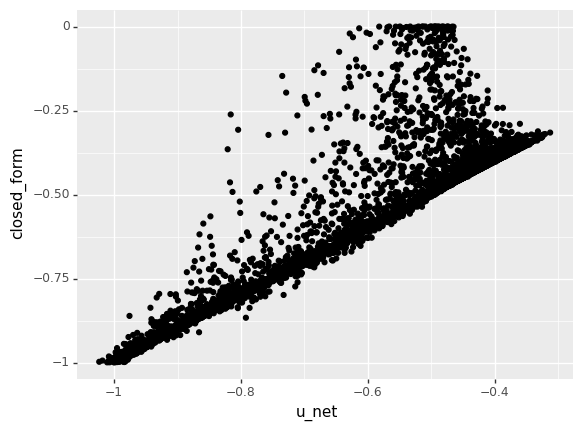

<ggplot: (8730080825941)>

time: 618 ms (started: 2022-07-14 17:13:08 +00:00)


In [ ]:
u_internal_sample = internal_sample

u_net_results = trainMertonAlloc.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [ ]:

np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

0.006215690416673808

time: 13.2 ms (started: 2022-07-14 17:13:12 +00:00)


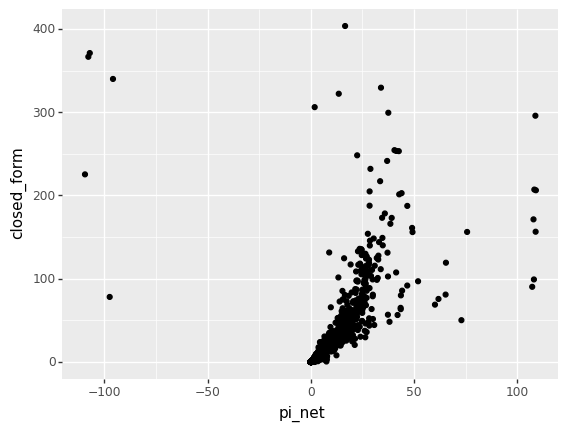

<ggplot: (8730083229341)>

time: 1.13 s (started: 2022-07-14 17:13:13 +00:00)


In [ ]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

0.8027012078308436

time: 19.3 ms (started: 2022-07-14 11:08:03 +00:00)


In [ ]:
# keeping the value net fixed and optimizing just the control net!!!




### With KL Gamma 

### Unused

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/DGM'

Mounted at /content/drive
time: 24 s (started: 2022-07-08 14:30:39 +00:00)


In [ ]:
#torch.save(trainMertonAlloc.net.state_dict(), os.path.join(filepath, 'unet_trained_15k_epochs.pt'))
#torch.save(mequation.pi_net.state_dict(), os.path.join(filepath, 'pi_net_trained_15k_epochs_4ep.pt'))

time: 14.2 ms (started: 2022-07-08 07:19:57 +00:00)


In [ ]:
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.load_state_dict(torch.load(os.path.join(filepath, 'unet_trained_15k_epochs.pt')))

<All keys matched successfully>

time: 589 ms (started: 2022-07-08 14:31:30 +00:00)


In [ ]:
u_net.to('cuda:0')

MertonUtilityNet(
  (fc_input): Linear(in_features=5, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 4.95 ms (started: 2022-07-08 14:31:57 +00:00)


In [ ]:
mequation = MertonEquation(MertonUtilityNet( NL = 1 , NN = 3 ), MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 100, depth=5 ), 1, 10000.0)
# val_sample_to_use = tuple([ x.cpu().detach() for x in mequation.sample(sample_method_X="U", size=1) ] )
val_sample_to_use = mequation.sample(sample_method_X="U", size=1) 
# # gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   
val_sample_to_use[0][0,0] = 0.0
val_sample_to_use[0][0,2] = 0.05
val_sample_to_use[0][0,3] = 0.02
val_sample_to_use[0][0,4] = 0.25

In [ ]:
import torch

def u(q):
  x = q[:,1]
  y = q[:, 0]
  return x**2 + y**2
x = torch.randn(3, requires_grad=True)
t = torch.randn(3, requires_grad=True)
u_val = u(torch.cat((x, t), axis=1))

print(x,t,u_val)
print(torch.cat((t,x)))
# 1st derivatives
dt = torch.autograd.grad(u_val, x, grad_outputs=torch.ones_like(u_val), create_graph=True, allow_unused=True)
print(dt[0])
dt = torch.autograd.grad(u_val.sum(), torch.cat((t,x)), create_graph=True)
print(dt[0])
dx = torch.autograd.grad(u_val.sum(), x, create_graph=True)[0]

# 2nd derivatives (higher orders require `create_graph=True`)
ddx = torch.autograd.grad(dx.sum(), x)[0]
ddx

In [ ]:
!nvidia-smi

In [ ]:
2+2

4